Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!
Предлагаем вам принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью вашего проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

В ходе работы в пройдете все основные этапы полноценного исследования:
* загрузка и ознакомление с данными,
* предварительная обработка,
* полноценный разведочный анализ,
* разработка новых синтетических признаков,
* проверка на мультиколлинеарность,
* отбор финального набора обучающих признаков,
* выбор и обучение моделей,
* итоговая оценка качества предсказания лучшей модели,
* анализ важности ее признаков.

Дополнительное задание
Для тех, кому этого покажется мало у нас есть дополнительное задание — создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.
Мастерская будет проходить в виде соревнования на платформе Kaggle. Длительность — 2 недели. Для участников — это отличная возможность не только выполнить интересный проект, который можно будет добавить в свое портфолио, но и познакомиться с одной из самых популярных соревновательных Интернет-площадок, на которой можно исследовать и создавать модели, взаимодействовать с другими специалистами по данным, организовывать и участвовать в конкурсах, посвященных анализу данных и машинному обучению

# Стоимость поддержанного автомобиля


Описание задачи.

В нашем распоряжении данные о продажах б\у машин. Необходимо провести анализ данных и разработать модель, которая предскажет стоимость автомобиля при продаже.

В ходе проекта мы провели следующие этапы:

* загрузка и ознакомление с данными
* предобработка данных
* разведочный анализ
* разработка новых синтетических признаков
* проверка на мультиколлинеарность
* отбор финального набора обучающих признаков
* выбор и обучение моделей
* итоговая оценка качества предсказания лучшей модели
* анализ важности ее признаков

## Загрузка данных.

In [1]:
# pip install -U scikit-learn

In [2]:
# pip install vininfo[cli]

In [3]:
# pip install catboost

In [4]:
# pip install ipywidgets

In [5]:
# jupyter nbextension enable --py widgetsnbextension

Загрузим данные и посмотрим общзую информацию о них.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from numpy.random import RandomState
from scipy import stats as st
from datetime import datetime

from sklearn.model_selection import GridSearchCV

from catboost import Pool, CatBoostRegressor

from vininfo import Vin
import statistics

In [7]:
data_train = pd.read_csv('./train.csv')

In [8]:
data_train_sellingprice = data_train[['sellingprice', 'vin']]

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [10]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [11]:
data_test = pd.read_csv('./test.csv')

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [13]:
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [14]:
data_sample_submission = pd.read_csv('./sample_submission.csv')

In [15]:
data_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           110058 non-null  object 
 1   sellingprice  110058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [16]:
data_sample_submission.head()

,vin,sellingprice
0,1g6dp567450124779,13592.209588
1,1gtw7fca7e1902207,13592.209588
2,jn8az1mw6dw303497,13592.209588
3,2g1wf5e34d1160703,13592.209588
4,1n6aa0ec3dn301209,13592.209588


**Вывод:**

Типы данных соответсвуют заявленным. В данных есть пропуски. Больше всего в признаке `transmission `. Заполним их на следующем этапе.

## Предобработка данных

### Обработка пропусков в данных

Посмотрим долю пропусков в данных.

In [17]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0: 'gap'})
            .query('gap > 0')
            .sort_values(by='gap', ascending=True)
            .plot(kind='barh', figsize=(15, 5), grid=True, legend=False, fontsize=16)
            .set_title(f'Процент пропусков в каждом признаке', fontsize=20)
        );
    except:
        print('Пропусков не осталось или произошла ошибка в первой части функции ')

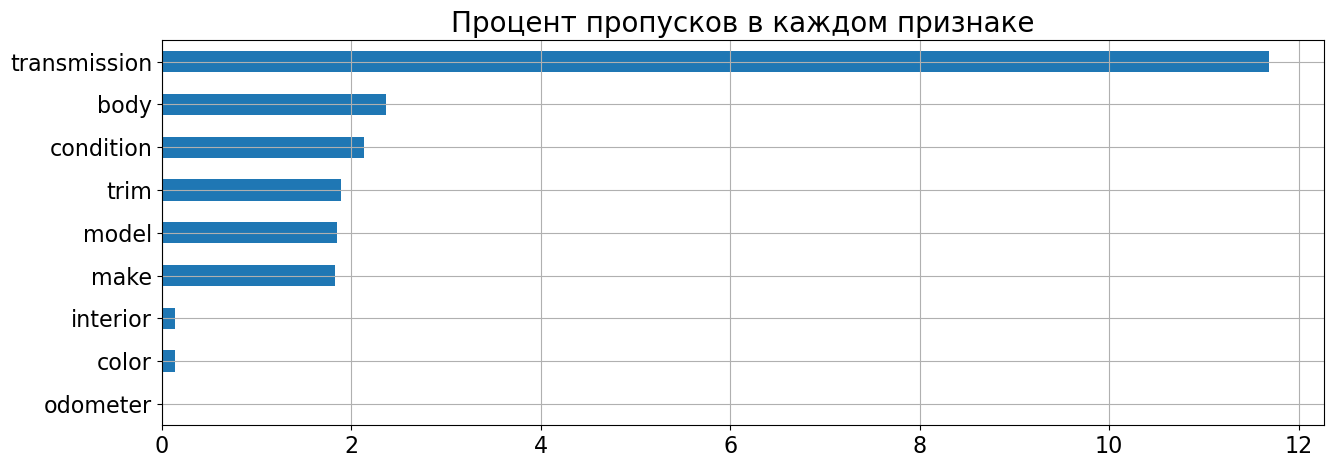

In [18]:
pass_value_barh(data_train)

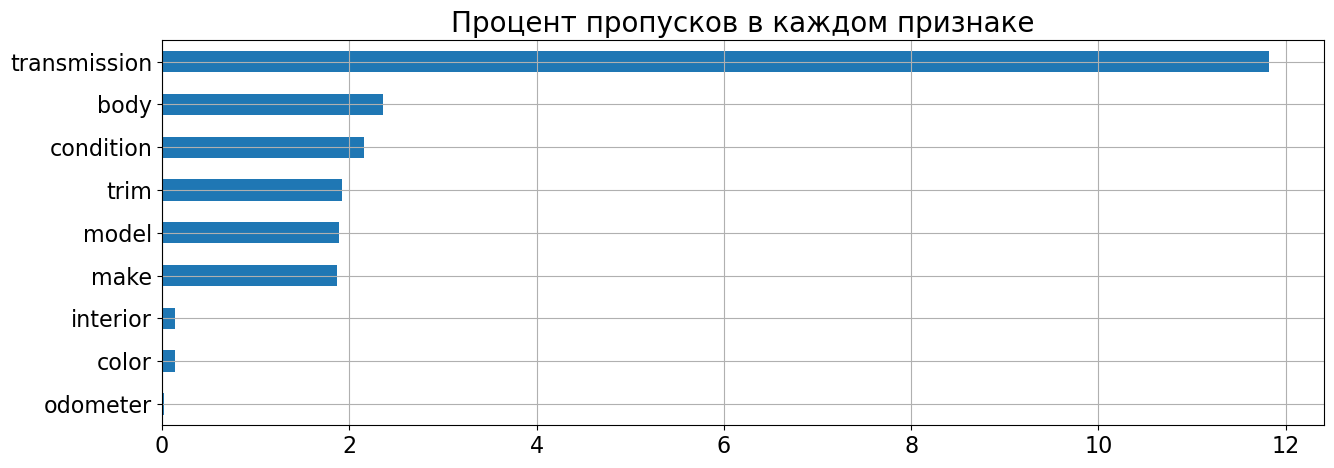

In [19]:
pass_value_barh(data_test)

#### Заполнение пропусков в 'color' и 'interior'

Небольшой процент пропусков в признаках 'color' и 'interior' заполним модой.

In [20]:
data_train['color'].value_counts(), data_train['interior'].value_counts()

(black        87115
 white        84149
 silver       65667
 gray         65284
 blue         40237
 red          34514
 —            19520
 green         8975
 gold          8934
 beige         7257
 burgundy      7059
 brown         5320
 orange        1629
 purple        1250
 off-white     1143
 yellow         979
 charcoal       389
 turquoise      183
 pink            32
 lime            14
 Name: color, dtype: int64,
 black        192442
 gray         140843
 beige         46878
 tan           34709
 —             13563
 brown          6818
 red            1070
 blue            885
 silver          844
 off-white       373
 purple          276
 gold            256
 white           215
 green           198
 burgundy        155
 orange          109
 yellow           16
 Name: interior, dtype: int64)

In [21]:
data_train['interior'] = data_train['interior'].fillna(statistics.mode(data_train['interior']))
data_train['color'] = data_train['color'].fillna(statistics.mode(data_train['color']));

In [22]:
data_test['color'].value_counts(), data_test['interior'].value_counts()

(black        22006
 white        20928
 silver       16360
 gray         16348
 blue         10180
 red           8384
 —             4948
 green         2270
 gold          2207
 beige         1826
 burgundy      1759
 brown         1300
 orange         407
 purple         284
 off-white      275
 yellow         274
 charcoal        84
 turquoise       49
 pink            10
 lime             1
 Name: color, dtype: int64,
 black        48176
 gray         34984
 beige        11931
 tan           8658
 —             3380
 brown         1664
 red            264
 blue           241
 silver         225
 off-white      107
 gold            64
 purple          58
 green           44
 burgundy        34
 orange          33
 white           33
 yellow           4
 Name: interior, dtype: int64)

In [23]:
data_test['interior'] = data_test['interior'].fillna(statistics.mode(data_test['interior']))
data_test['color'] = data_test['color'].fillna(statistics.mode(data_test['color']));

#### Заполнение пропусков в 'make' при помощи библиотеки Vin.

In [24]:
def vin_make(x):
    str = x
    return Vin(str.upper()).manufacturer

In [25]:
data_train['make'] = data_train['vin'].apply(lambda x: vin_make(x))

In [26]:
# data_test['vin'] = data_test_vin
data_test['make'] = data_test['vin'].apply(lambda x: vin_make(x))

#### Заполнение пропусков в "transmission"

Почти 12% пропусков в признаке 'transmission' - характеристика коробки передач (механика или автомат). Для заполнения пропусков в этом столбце будем исходить из предположения , что для одних и тех же производителей и моделей машин, механическая коробка передач будет всегда стоить дешевле. Сгруппируем данные по производителю, моделии году производства: 'make', 'model', 'year'.

Сформируем таблицу, в которой определим наиболее часто встречающееся значение трансмиссии для определённой модели, производителя, года.

In [27]:
df = (data_train.astype({'year' : str})
             .query('transmission.isna()==False')
             .groupby(['year', 'make', 'model'])['transmission']
             .value_counts(1)
             .to_frame()
).sort_values (by = ['make']).unstack().fillna(0)
df.columns = df.columns.map('_'.join)
df.index = df.index.map(' '.join)
df

,transmission_automatic,transmission_manual
2001 AM H1,1.0,0.0
2001 Acura CL,1.0,0.0
2001 Acura Integra,1.0,0.0
2001 Acura MDX,1.0,0.0
2001 Acura RL,1.0,0.0
...,...,...
1986 Mercedes-Benz 420sel,1.0,0.0
1989 Chevrolet corvette,1.0,0.0
1989 Mercedes-Benz 300e,1.0,0.0
1989 Toyota camry,1.0,0.0


In [28]:
df['transmission'] = df.apply(lambda x: 'automatic' if x['transmission_automatic'] >= x['transmission_manual'] else 'manual', axis=1)
df

,transmission_automatic,transmission_manual,transmission
2001 AM H1,1.0,0.0,automatic
2001 Acura CL,1.0,0.0,automatic
2001 Acura Integra,1.0,0.0,automatic
2001 Acura MDX,1.0,0.0,automatic
2001 Acura RL,1.0,0.0,automatic
...,...,...,...
1986 Mercedes-Benz 420sel,1.0,0.0,automatic
1989 Chevrolet corvette,1.0,0.0,automatic
1989 Mercedes-Benz 300e,1.0,0.0,automatic
1989 Toyota camry,1.0,0.0,automatic


Напишем функцию, которая заполнит пропуски в `transmission` в соответсвии с наиболее часто встречающимся значением для определённого года, производителя и модели.

In [29]:
def fillna_transmission(row):
    year = str(row['year'])
    make = str(row['make'])
    model = str(row['model'])
    
    row_index = year +  ' ' + make + ' ' + model
    if (row['transmission'] != 'automatic') & (row['transmission'] != 'manual'):
        if row_index in df.index:
            row['transmission'] = df.loc[row_index, 'transmission']
        else: row['transmission'] = 'unknown'
    else:
        row['transmission']=row['transmission']
    return row['transmission']

In [30]:
data_train['transmission'] = data_train.apply(lambda x: fillna_transmission(x), axis=1)

In [31]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,Hummer,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


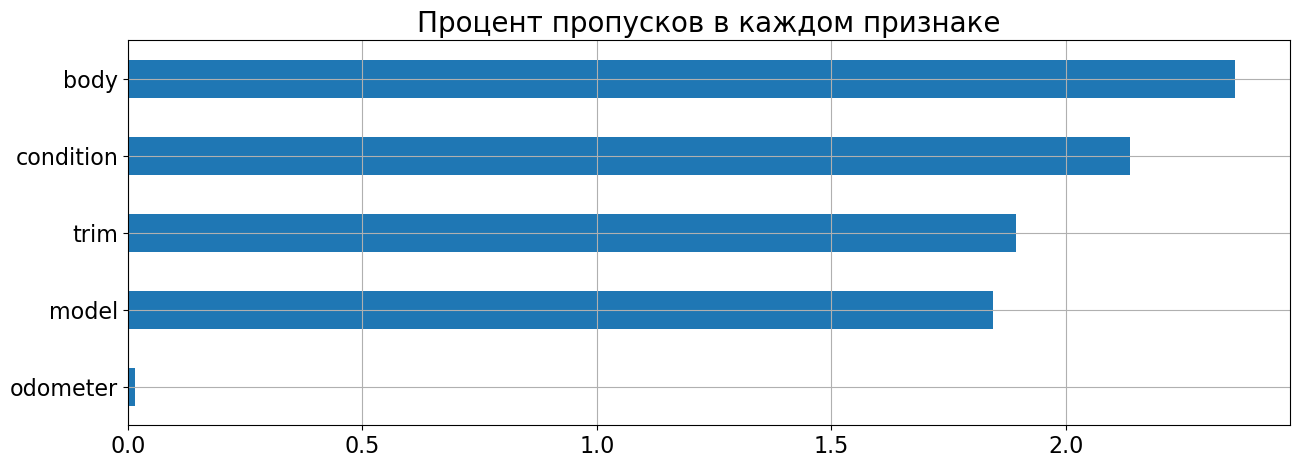

In [32]:
pass_value_barh(data_train)

In [33]:
data_test['transmission'] = data_test.apply(lambda x: fillna_transmission(x), axis=1)

In [34]:
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC Truck,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


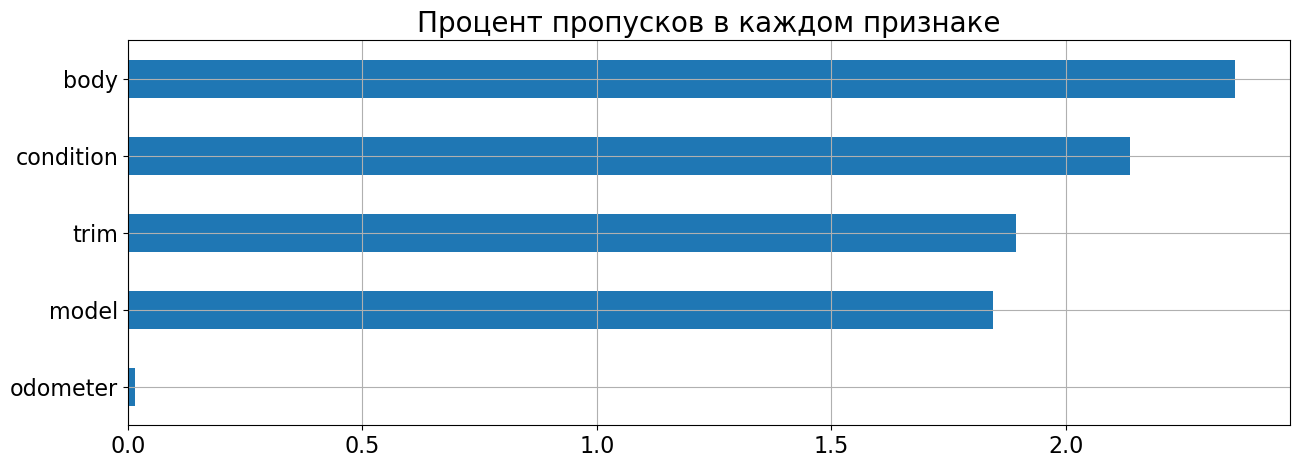

In [35]:
pass_value_barh(data_train)

#### Удаление строк с пропусками.

Для корректной работы модели остальные строки с пропусками удалим.

In [36]:
def loss_share(df):
    old_shape = df.shape[0]
    df = df.dropna()
    new_shape = df.shape[0]
    result = 1 - new_shape / old_shape
    print('Процент удаленных строк:', round(result*100, 2), '%.')
    return df

In [37]:
data_train = loss_share(data_train)

Процент удаленных строк: 4.41 %.


Пропусков не осталось или произошла ошибка в первой части функции 


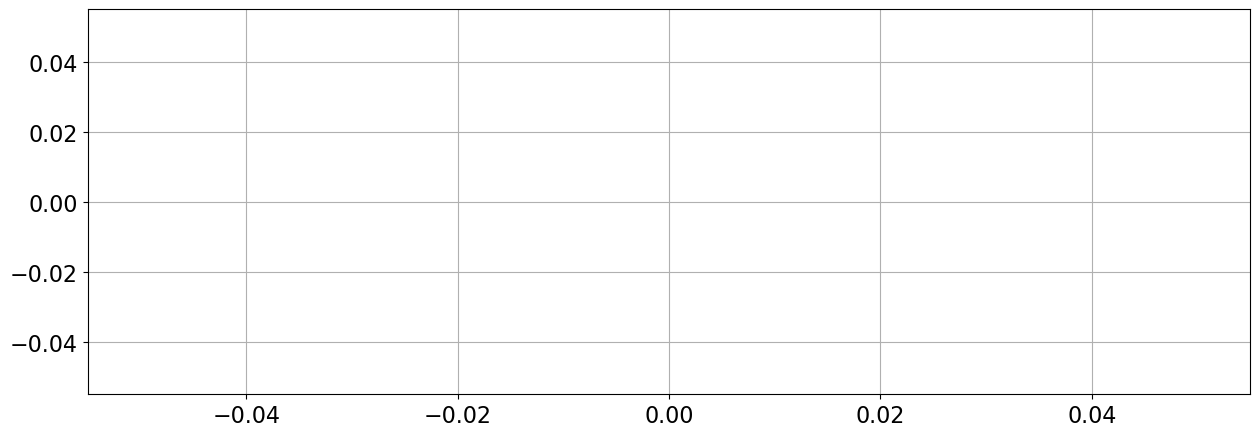

In [38]:
pass_value_barh(data_train)

#### Заполнение пропусков в тестовой выборке

In [39]:
categories=['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

data_test[categories] = data_test[categories].fillna('-1')
data_test = data_test.fillna(-1)

Пропусков не осталось или произошла ошибка в первой части функции 


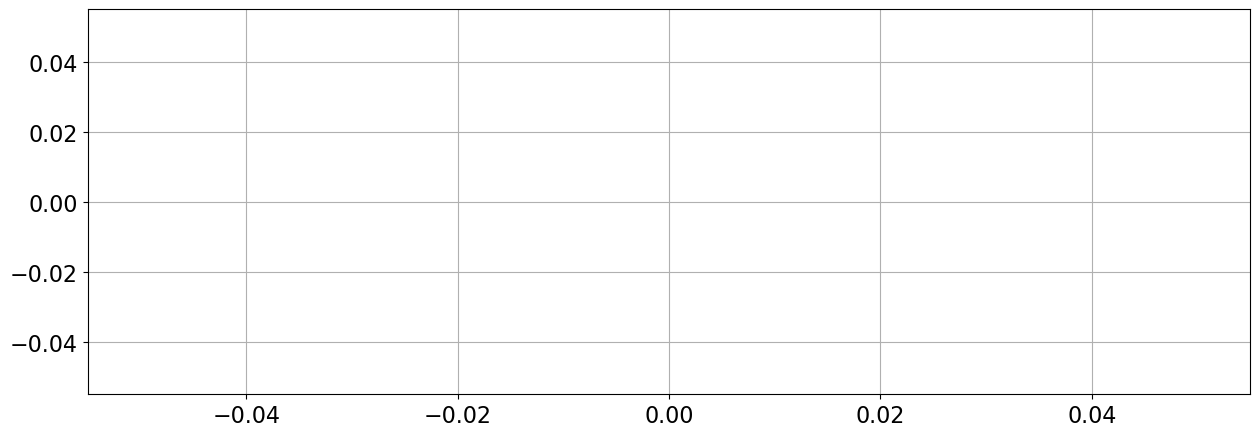

In [40]:
pass_value_barh(data_test)

**Вывод**

После удаления строк с пропуками из обучающей выборки мы потерыли около 4% данных, что допустимо. Для тестовой выборки мы заполнили все пропуски, чтобы получить предсказания по всем объектам.

### Изучим дубликаты в датафрейме

Проверим данные на явные дубликаты.

In [41]:
data_train.duplicated().sum(), data_test.duplicated().sum()

(0, 0)

Явных дубликатов нет, поэтому посмотрим на значения в столбцах 'make', 'model', 'trim', 'body'. Видно что в разных строках есть записи в разных регистрих. Приведём всё к нижнему регистру и избавимся таким образом от неявных дубликатов.
Напишем функцию для подсчёта уникальных значений в столбцах, чтобы отследить изменения.

In [42]:
def clean_duplicates(data, columns_names):
    nm_1 = []
    nm_2 = []
    for i in columns_names:
        nm_1.append(len(data[i].unique()))
    data[columns_names] = data[columns_names].apply(lambda x: x.str.lower())
    for i in columns_names:
        nm_2.append(len(data[i].unique()))
    
    dt = pd.DataFrame(data={'Признак': columns_names, 'Кол-во уникальных значений до': nm_1, 'Кол-во уникальных значений после': nm_2})
    return dt

In [43]:
columns_names = ['make', 'model', 'trim', 'body']

clean_duplicates(data_train, columns_names)

,Признак,Кол-во уникальных значений до,Кол-во уникальных значений после
0,make,81,81
1,model,764,760
2,trim,1501,1482
3,body,85,45


In [44]:
clean_duplicates(data_test, columns_names)

,Признак,Кол-во уникальных значений до,Кол-во уникальных значений после
0,make,80,80
1,model,825,747
2,trim,1497,1458
3,body,78,43


**Вывод**

На этапе предобработки мы заполнили пропуски в данных в признаках `transmission`, `color`, `interior`. Также заполнили пропуски в данных о производителе при помощи библиотеки vininfo.

Мы удалили неявные дубликаты в категориальных признаках. И удалили оставшиеся строки с пропусками. Они составили чуть более 4% для учебной выборки.

## Добавление новых признаков.

### Работа с датой

Напишем функцию, которая обработает датафреймы и создаст необходимые синтетические признаки из даты продажи: год, месяц, день недели продажи, посчитает возраст машины. Также функция удалит признак 'saledate', он нам больше не понадобится. Также напишем функцию, которая определит был ли день продажи выходным или нет.

In [45]:
def is_weekend(row):
    day = row['weekday']
    if day > 4:
        is_weekend = 1
    else:
        is_weekend = 0
    return is_weekend

In [46]:
def create_signs(df):
    df['sale_year'] = pd.to_datetime(df['saledate'], utc=True).dt.year
    df['sale_month'] = pd.to_datetime(df['saledate'], utc=True).dt.month
    df['weekday'] = pd.to_datetime(df['saledate'], utc=True).dt.weekday
    df['car_age'] = df['sale_year'] - df['year']
    df['is_weekend'] = df.apply(lambda x: is_weekend(x), axis=1)
    df.drop(['saledate'], axis=1, inplace=True)
    return df

In [47]:
create_signs(data_train)
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,sale_year,sale_month,weekday,car_age,is_weekend
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015,6,0,4,0
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015,2,1,1,0
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015,6,1,3,0
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015,6,1,12,0
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015,2,0,8,0


In [48]:
create_signs(data_test)
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015,1,1,10,0
1,2014,gmc truck,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015,2,3,1,0
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015,2,0,2,0
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2015,6,1,2,0


**Вывод**

Мы создали дополнительные признаки: год, месяц, день недели продажи, возраст машины, а также выходной или будний день был день продажи.

### Добавление признаков из библиотеки vininfo.

In [49]:
def create_signs_vin_country(x):
    str = x
    country = Vin(str.upper()).country
    return country

def create_signs_vin_region(x):
    str = x
    region = Vin(str.upper()).region
    return region

def create_signs_vin_vds(x):
    str = x
    region = Vin(str.upper()).vds
    return region

def apply_func(df):
    df['country'] = df['vin'].apply(lambda x: create_signs_vin_country(x))
    df['region'] = df['vin'].apply(lambda x: create_signs_vin_region(x))
    df['vds'] = df['vin'].apply(lambda x: create_signs_vin_vds(x))
    return df

In [50]:
apply_func(data_train);

In [51]:
apply_func(data_test);

In [52]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,seller,sellingprice,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,santander consumer,12500,2015,6,0,4,0,Canada,North America,DK3JC4
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,ars/avis budget group,14500,2015,2,1,1,0,Mexico,North America,6P0H75
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,nissan-infiniti lt,9100,2015,6,1,3,0,Mexico,North America,AB6AP4
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,wichita falls ford lin inc,13300,2015,6,1,12,0,United States,North America,GN23U9
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,purple heart,1300,2015,2,0,8,0,Mexico,North America,HP08Z1


In [53]:
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,...,black,lexus of stevens creek,2015,1,1,10,0,United States,North America,DP5674
1,2014,gmc truck,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,...,gray,u-haul,2015,2,3,1,0,United States,North America,W7FCA7
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,...,black,nissan-infiniti lt,2015,2,0,2,0,Japan,Asia,AZ1MW6
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,...,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0,Canada,North America,WF5E34
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,...,black,nissan north america inc.,2015,6,1,2,0,United States,North America,AA0EC3


**Вывод**

Для каждого объекта мы добавили данные о стране и регионе производства машины, а также vds (Vehicle Description Section) номер, в который состоит из шести знаков, обозначающих транспортное средство согласно конструкторской документации. Расшифровка второй части вин кода автомобиля может рассказать о типе кузова, двигателя, коробки передач, классе безопасности, оснащении.

### Посмотрим экстремальные значения

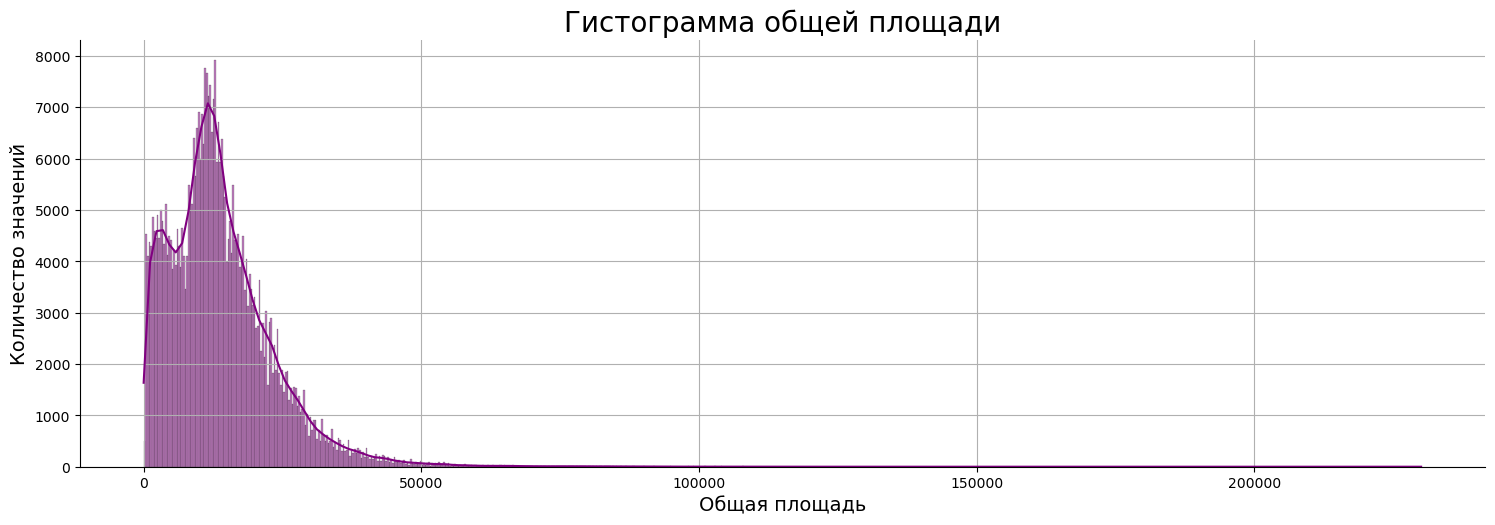

In [54]:
sns.displot(data_train, x='sellingprice', kde=True, color='purple', alpha=0.5,  height= 5 , aspect= 3)
plt.grid(True)
plt.title('Гистограмма общей площади', fontsize=20)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Количество значений', fontsize=14)
plt.show()

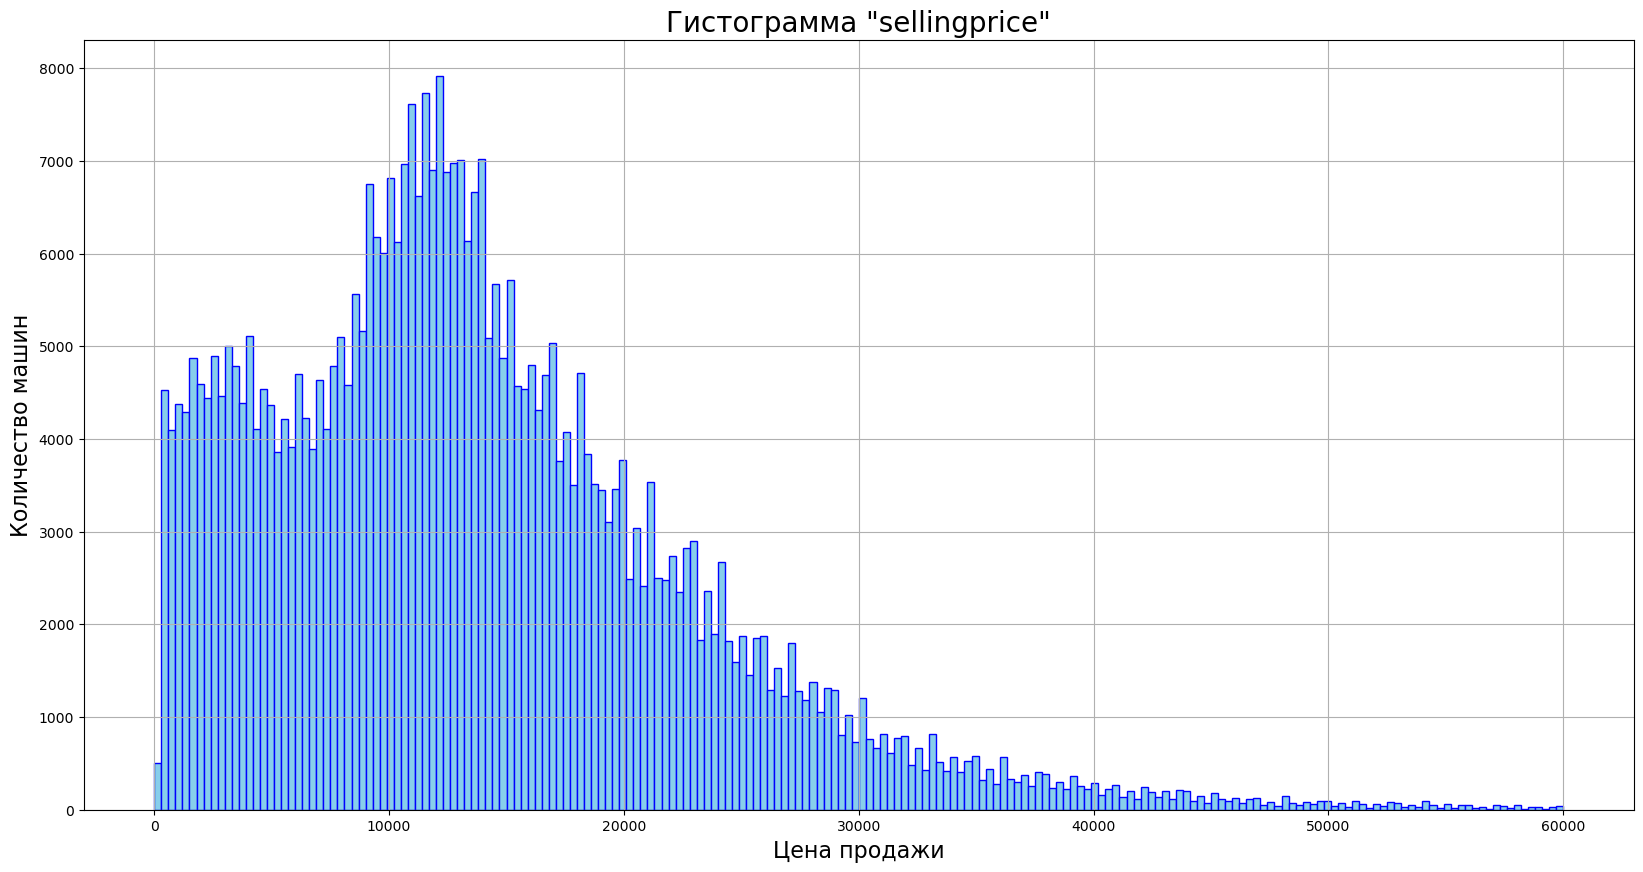

In [55]:
data_train.hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue')
plt.title('Гистограмма "sellingprice"', fontsize=20)
plt.xlabel('Цена продажи', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [56]:
data_train['sellingprice'].quantile(.99), data_train['sellingprice'].quantile(.01)

(44750.0, 500.0)

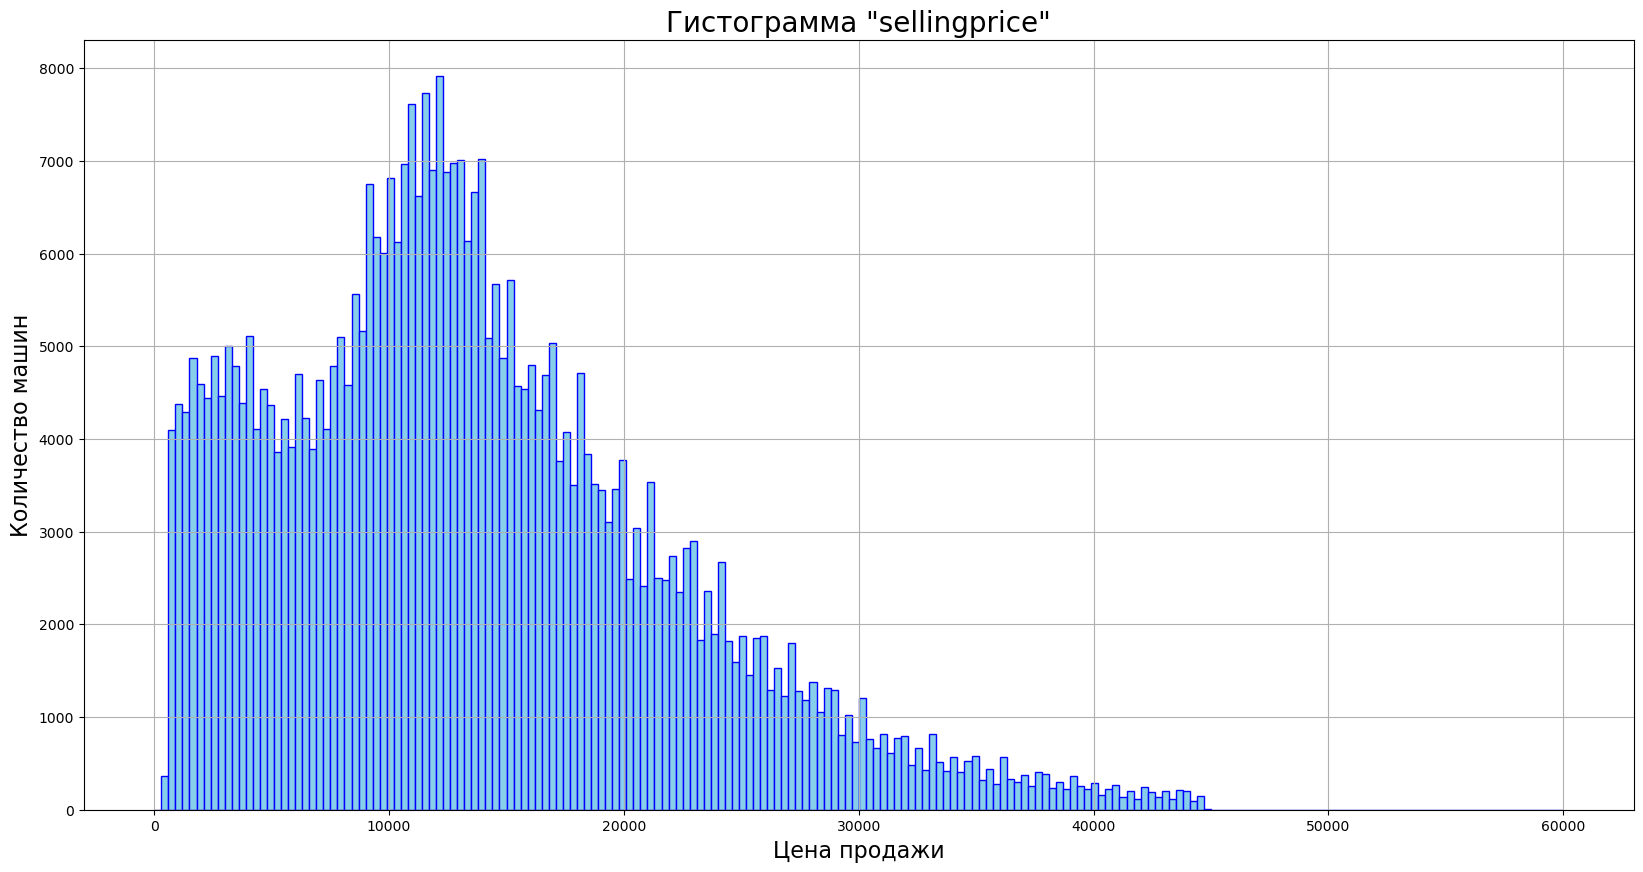

In [57]:
(data_train
         .query("sellingprice.quantile(.01) < sellingprice < sellingprice.quantile(.99)")
         .hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue'))
plt.title('Гистограмма "sellingprice"', fontsize=20)
plt.xlabel('Цена продажи', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [58]:
data_train = data_train.query("sellingprice.quantile(.01) < sellingprice < sellingprice.quantile(.99)")

In [59]:
data_train.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'sale_year', 'sale_month', 'weekday', 'car_age', 'is_weekend',
       'country', 'region', 'vds'],
      dtype='object')

In [60]:
data_train['odometer'].apply(['mean', 'median', 'min', 'max'])

mean       65602.26471
median     49935.00000
min            1.00000
max       999999.00000
Name: odometer, dtype: float64

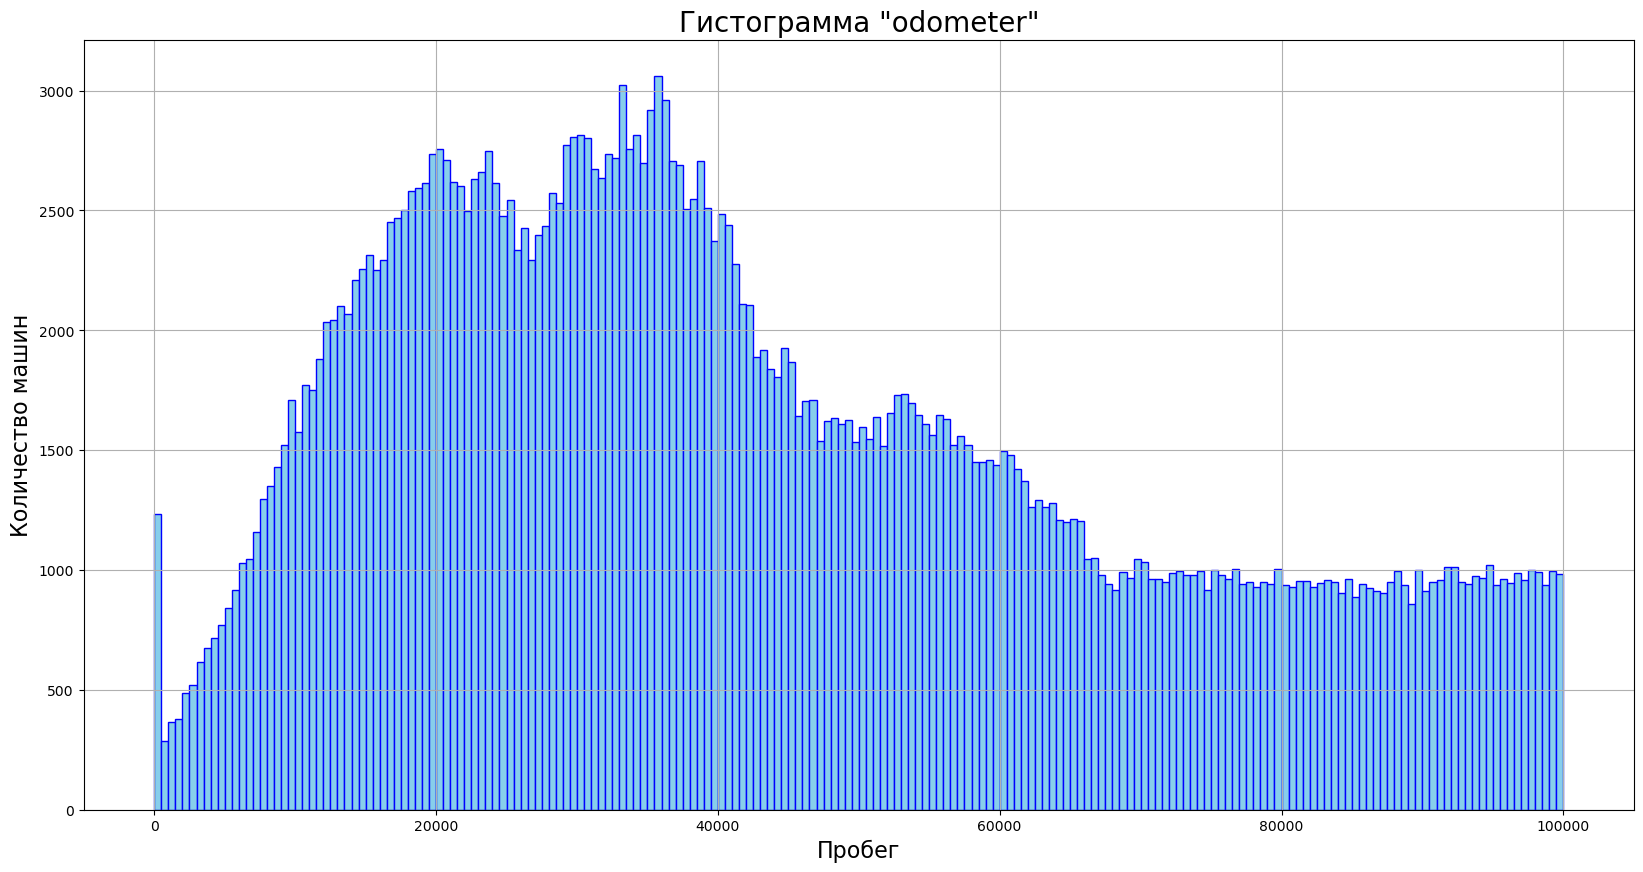

In [61]:
data_train.hist('odometer', bins=200, figsize=(20, 10), range=(0, 100000), color='skyblue', edgecolor='blue')
plt.title('Гистограмма "odometer"', fontsize=20)
plt.xlabel('Пробег', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [62]:
data_train[data_train['odometer'] == 1]['sellingprice'].mode()

0    600
Name: sellingprice, dtype: int64

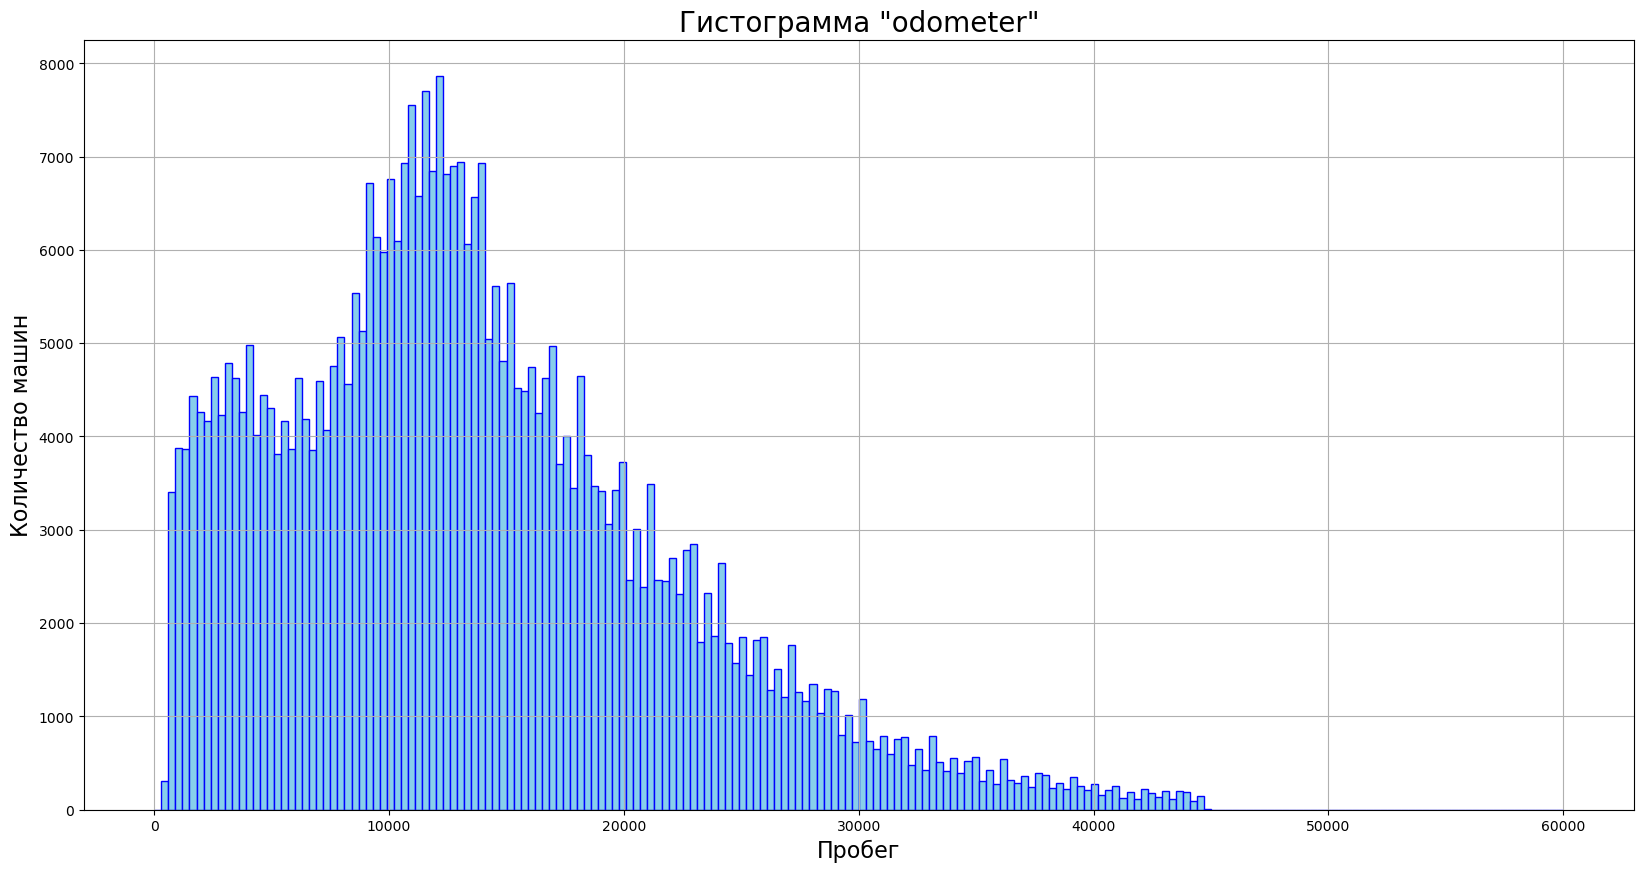

In [63]:
(data_train
         .query("odometer.quantile(.01) < odometer < odometer.quantile(.99)")
         .hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue'))
plt.title('Гистограмма "odometer"', fontsize=20)
plt.xlabel('Пробег', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

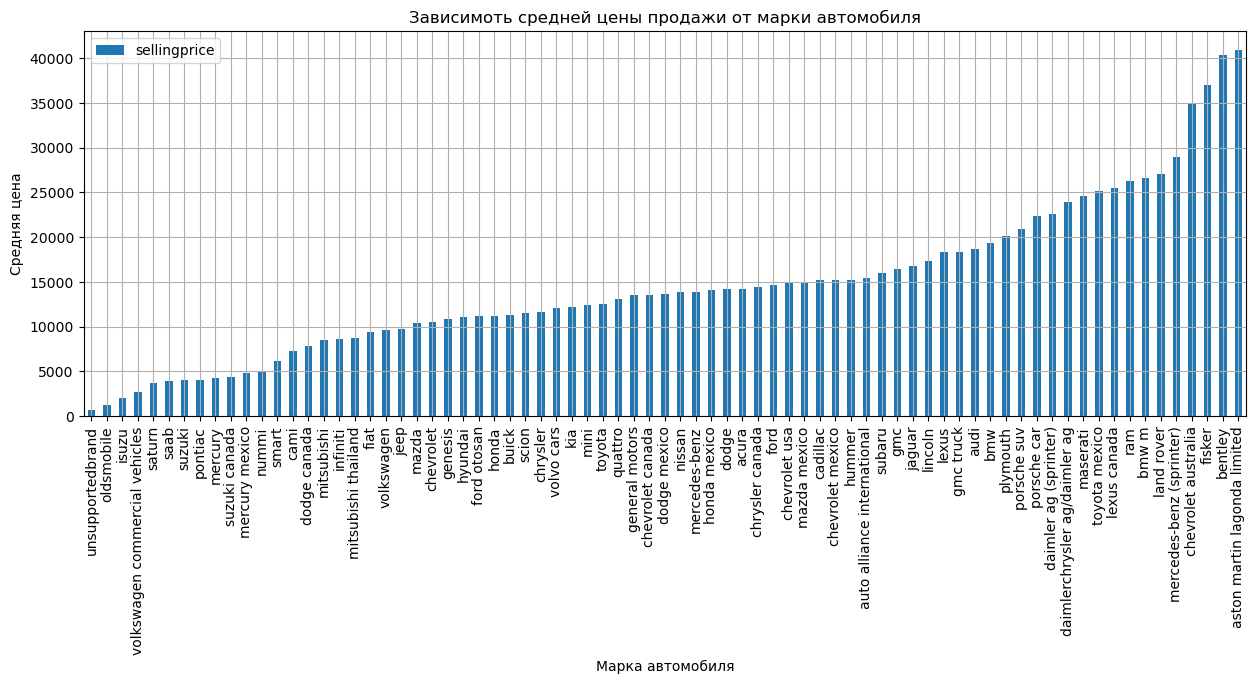

In [64]:
position_make = np.arange(len(data_train['make'].unique()))
fig, ax = plt.subplots()
(
    data_train
    .pivot_table(index='make', values='sellingprice', aggfunc='mean')
    .sort_values(by = ['sellingprice'], ascending = True)
    .plot(kind='bar', grid=(True), figsize=(15, 5), ax=ax)
)

plt.xlabel('Марка автомобиля')
plt.ylabel('Средняя цена')
plt.title('Зависимоть средней цены продажи от марки автомобиля')
ax.set_xticks(position_make)
plt.xticks(rotation=90)
plt.show()

In [65]:
len(data_train['body'].unique())

43

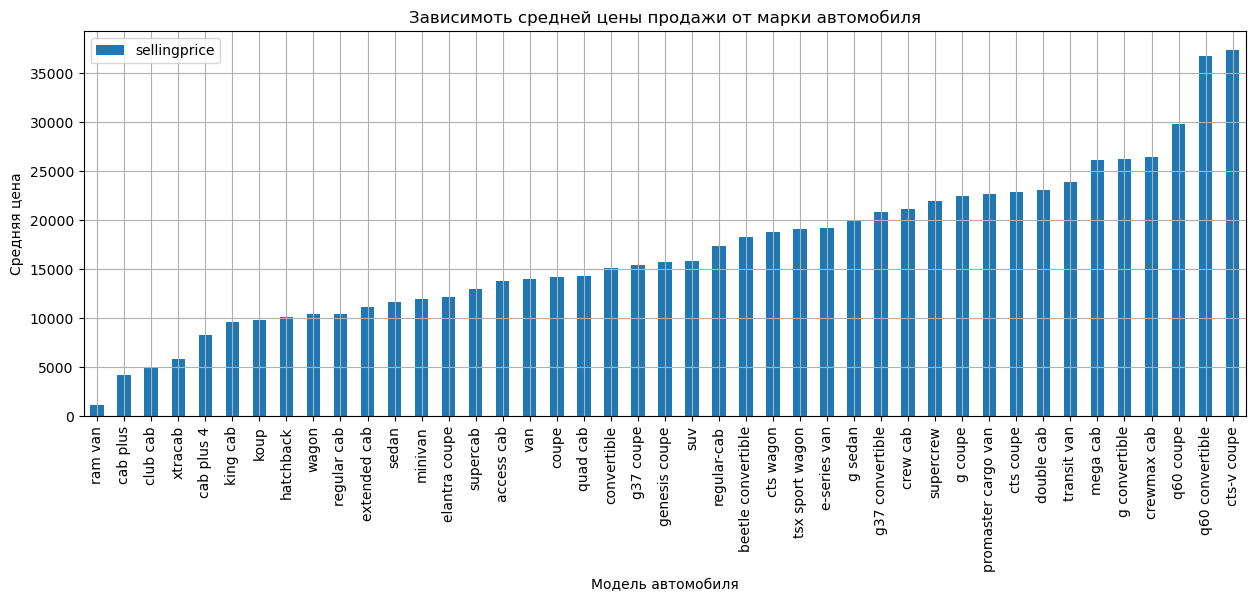

In [66]:
position_body = np.arange(len(data_train['body'].unique()))
fig, ax = plt.subplots()
(
    data_train
    .pivot_table(index='body', values='sellingprice', aggfunc='mean')
    .sort_values(by = ['sellingprice'], ascending = True)
    .plot(kind='bar', grid=(True), figsize=(15, 5), ax=ax)
)

plt.xlabel('Модель автомобиля')
plt.ylabel('Средняя цена')
plt.title('Зависимоть средней цены продажи от марки автомобиля')
ax.set_xticks(position_body)

plt.xticks(rotation=90)
plt.show()

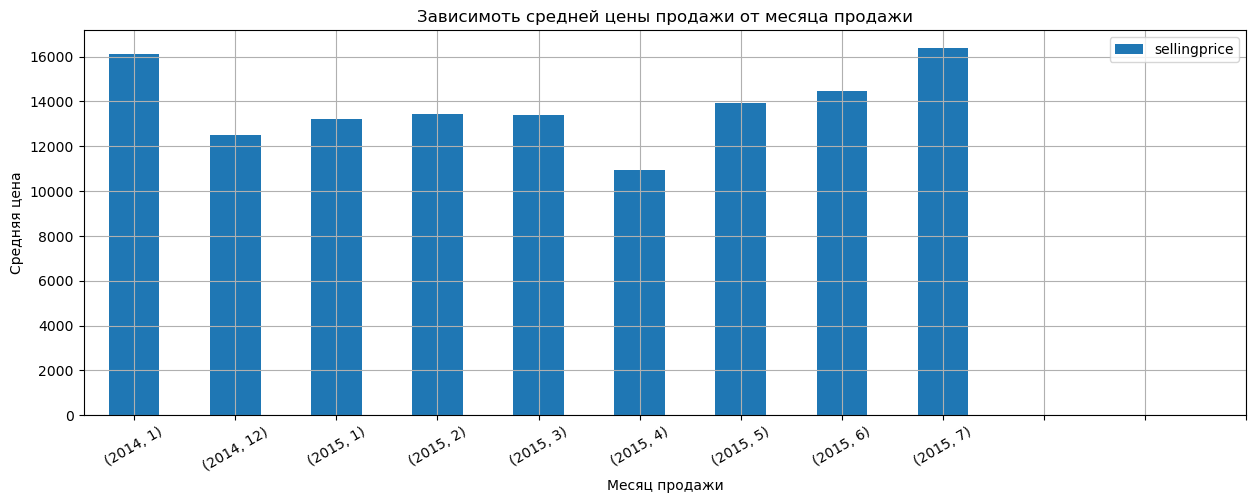

In [67]:
position_month = np.arange(12)
fig, ax = plt.subplots()
(
    data_train
    .pivot_table(index=['sale_year', 'sale_month'], values='sellingprice', aggfunc='mean')
    .plot(kind='bar', grid=(True), figsize=(15, 5), ax=ax)
)

plt.xlabel('Месяц продажи')
plt.ylabel('Средняя цена')
plt.title('Зависимоть средней цены продажи от месяца продажи')
ax.set_xticks(position_month)
#ax.set_xticklabels(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабря'])
plt.xticks(rotation=30)
plt.show()

**Вывод**

На этапе исследовательского анализа мы удалили выбросы в признаках `sellingprice`(цена продажи) и `odometer` (пробег). Выяснили, что есть прямая связь между маркойи моделью машины и ценой продажи.

## Разделение на features и target

Напишем функцию для разделения выборки на обучающую и валидационную.

In [68]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,seller,sellingprice,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,santander consumer,12500,2015,6,0,4,0,Canada,North America,DK3JC4
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,ars/avis budget group,14500,2015,2,1,1,0,Mexico,North America,6P0H75
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,nissan-infiniti lt,9100,2015,6,1,3,0,Mexico,North America,AB6AP4
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,wichita falls ford lin inc,13300,2015,6,1,12,0,United States,North America,GN23U9
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,purple heart,1300,2015,2,0,8,0,Mexico,North America,HP08Z1


In [69]:
def split(df):

    target = df['sellingprice']
    features = df.drop(['sellingprice'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25,
                                                                             random_state=12345)

    print('Размер обучающей выборки:', features_train.shape[0], 'строк')
    print('Размер валидационной выборки:', features_valid.shape[0], 'строк')
    return features_train, features_valid, target_train, target_valid

In [70]:
features_train, features_valid, target_train, target_valid = split(data_train);

Размер обучающей выборки: 308928 строк
Размер валидационной выборки: 102976 строк


Удалим из датасета vin номер. Это не признак, а уникальное идентификационный номер.

In [71]:
features_train_vin = features_train['vin']
features_train = features_train.drop(['vin'], axis=1)

In [72]:
features_valid_vin = features_valid['vin']
features_valid = features_valid.drop(['vin'], axis=1)

In [73]:
data_test_vin = data_test['vin']
data_test = data_test.drop(['vin'], axis=1)

## Добавление синтетических признаков

Добавим синтетические признаки по цене продажи авто после разделения выборки на учебную и валидационную выборки, чтобы избежать утечки данных о стоимости автомобилей в валидационную выборку.

### Расчёт средней цены продажи по модели, году выпуска и производителю.

In [74]:
# features_train_new = features_train.copy()
# features_train_new['sellingprice'] = target_train
# features_train_new

In [75]:
features_train['sellingprice'] = target_train
features_train

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,seller,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds,sellingprice
336387,2012,nissan,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,...,capital one auto finance,2015,3,1,3,0,United States,North America,AL2APX,10600
219354,2012,ram,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,...,automobiles paille inc,2015,3,2,3,0,United States,North America,RD7FP7,13500
83958,2012,nissan,rogue,s,suv,automatic,fl,4.4,27573.0,gray,...,nissan-infiniti lt,2015,6,1,3,0,Japan,Asia,AS5MV3,17400
321359,2012,gmc,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,...,tdaf remarketing,2015,1,0,3,0,Mexico,North America,P2XE21,33000
121858,2000,nissan,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,...,vw of freehold,2015,1,1,15,0,Japan,Asia,CA31A1,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371412,2002,toyota,corolla,ce,sedan,manual,md,2.0,153930.0,blue,...,355 toyota,2015,2,0,13,0,Canada,North America,BR12E2,850
422553,2011,lexus,is 250,base,sedan,automatic,nj,3.7,69099.0,black,...,lexus financial services,2015,5,1,4,0,Japan,Asia,CF5C23,17400
419432,2013,ford,focus,se,sedan,automatic,ne,3.9,53833.0,silver,...,dtg operations inc,2015,3,2,2,0,United States,North America,DP3F29,9900
82511,2013,chevrolet canada,equinox,lt,suv,automatic,mo,4.4,41827.0,black,...,sutton ford/ge,2015,1,2,2,0,Canada,North America,ALDEK1,16600


In [76]:
mean_sellingprice_per_year = features_train.groupby(['year', 'make', 'model', 'sale_year'])['sellingprice'].median()
mean_sellingprice_per_year

year  make        model       sale_year
1990  chevrolet   corvette    2015          3900.0
      lexus       ls 400      2014           700.0
      mazda       mx-5 miata  2015          1650.0
      nissan      300zx       2015          2300.0
      toyota      4runner     2015           550.0
                                            ...   
2015  volvo cars  s80         2015         27000.0
                  v60         2014         30000.0
                              2015         27100.0
                  xc60        2015         29500.0
                  xc70        2015         32500.0
Name: sellingprice, Length: 7763, dtype: float64

In [77]:
def mean_price_per_year(row):
    year = row['year']
    make = row['make']
    model = row['model']
    sale_year = row['sale_year']
    if (year, make, model, sale_year) in mean_sellingprice_per_year.index:
        price_year = mean_sellingprice_per_year.loc[(year, make, model, sale_year)]
    else:
        price_year = np.nan
    row['price_year'] = price_year
    return row['price_year']

In [78]:
# def price_year(row):
#     year = row['year']
#     for i in dm.index:
#         if year == i:
#             row['price_year'] = dm[i]
#     return row['price_year']

In [79]:
%%timeit -n 1 -r 1
features_train['price_year'] = features_train.apply(lambda x: mean_price_per_year(x), axis=1)

2min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [80]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,holman ford lincoln turnersville,2015,2,1,7,0,United States,North America,HP35N1
400635,2011,gmc truck,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,td auto finance,2014,12,2,3,0,United States,North America,R1VE04
40210,2013,chevrolet canada,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,auto select inc,2015,6,3,2,0,Canada,North America,ALDEK0
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,"kia motors america, inc",2015,1,3,1,0,United States,North America,GM4A76
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,bmw north america greer,2015,2,0,0,0,Germany,Europe,VM1C57


In [81]:
%%timeit -n 1 -r 1
features_valid['price_year'] = features_valid.apply(lambda x: mean_price_per_year(x) , axis=1)

41.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [82]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,seller,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds,price_year
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,...,holman ford lincoln turnersville,2015,2,1,7,0,United States,North America,HP35N1,4100.0
400635,2011,gmc truck,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,...,td auto finance,2014,12,2,3,0,United States,North America,R1VE04,14700.0
40210,2013,chevrolet canada,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,...,auto select inc,2015,6,3,2,0,Canada,North America,ALDEK0,15800.0
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,...,"kia motors america, inc",2015,1,3,1,0,United States,North America,GM4A76,15100.0
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,...,bmw north america greer,2015,2,0,0,0,Germany,Europe,VM1C57,32875.0


#### Формирование синтетически признаков для data_test

Перед формирования синтетических признаков для тестовой выборки расчитаем среднюю цену продажи по всей учебной выборке модели, году выпуска и производителю. Таким образом получим большее разнообразие данных.

In [83]:
mean_sellingprice_per_year = data_train.groupby(['year', 'make', 'model', 'sale_year'])['sellingprice'].median()
mean_sellingprice_per_year

year  make        model            sale_year
1990  chevrolet   c/k 1500 series  2015          9750.0
                  corvette         2015          3900.0
      lexus       ls 400           2014           700.0
                                   2015          1100.0
      mazda       mx-5 miata       2015          1650.0
                                                 ...   
2015  volvo cars  s80              2015         27000.0
                  v60              2014         30000.0
                                   2015         27200.0
                  xc60             2015         29500.0
                  xc70             2015         32500.0
Name: sellingprice, Length: 8108, dtype: float64

In [84]:
%%timeit -n 1 -r 1
data_test['price_year'] = data_test.apply(lambda x: mean_price_per_year(x), axis=1)

43.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [85]:
%%timeit -n 1 -r 1
data_train['price_year'] = data_train.apply(lambda x: mean_price_per_year(x), axis=1)

2min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [86]:
data_test.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,seller,sale_year,sale_month,weekday,car_age,is_weekend,country,region,vds,price_year
0,2005,cadillac,cts,base,sedan,automatic,ca,2.7,116970.0,silver,...,lexus of stevens creek,2015,1,1,10,0,United States,North America,DP5674,3800.0
1,2014,gmc truck,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,...,u-haul,2015,2,3,1,0,United States,North America,W7FCA7,20400.0
2,2013,nissan,murano,s,suv,automatic,oh,4.6,11831.0,gray,...,nissan-infiniti lt,2015,2,0,2,0,Japan,Asia,AZ1MW6,18000.0
3,2013,chevrolet,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,...,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0,Canada,North America,WF5E34,9800.0
4,2013,nissan,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,...,nissan north america inc.,2015,6,1,2,0,United States,North America,AA0EC3,22200.0


### Расчёт средней цены продажи по уровню отделки салона автомобиля.

Сформируем таблицу с расчётом средней стоимости продажи машины в зависимости от её состояния, года продажи, марки машины.

In [87]:
pmc = features_train.groupby(['make', 'model', 'trim'])['sellingprice'].median()
pmc

make        model  trim               
acura       cl     2.2                     1400.0
                   2.2 premium              650.0
                   2.3                     1400.0
                   2.3 premium             1900.0
                   3.0                     1750.0
                                           ...   
volvo cars  xc90   3.2 r-design           15200.0
                   3.2 special edition     9700.0
                   t6                      3500.0
                   v8                      6800.0
                   v8 sport               11000.0
Name: sellingprice, Length: 3444, dtype: float64

In [88]:
def mean_price_per_trim(row):
   
    make = row['make']
    model = row['model']
    
    trim = row['trim']
    if (make, model, trim) in pmc.index:
        price_mean_trim = pmc.loc[(make, model, trim)]
    else:
        price_mean_trim = np.nan
    row['price_mean_trim'] = price_mean_trim
    return row['price_mean_trim']

In [89]:
%%timeit -n 1 -r 1
features_train['price_mean_trim'] = features_train.apply(lambda x: mean_price_per_trim(x), axis=1)

2min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [90]:
%%timeit -n 1 -r 1
features_valid['price_mean_trim'] = features_valid.apply(lambda x: mean_price_per_trim(x) , axis=1)

40.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Формирование синтетически признаков для data_test

In [91]:
pmc = data_train.groupby(['make', 'model', 'trim'])['sellingprice'].median()
pmc

make        model  trim               
acura       cl     2.2                     1400.0
                   2.2 premium              650.0
                   2.3                     1400.0
                   2.3 premium             1900.0
                   3.0                     1800.0
                                           ...   
volvo cars  xc90   3.2 r-design           16000.0
                   3.2 special edition    10200.0
                   t6                      3600.0
                   v8                      6700.0
                   v8 sport               11800.0
Name: sellingprice, Length: 3519, dtype: float64

In [92]:
%%timeit -n 1 -r 1
data_test['price_mean_trim'] = data_test.apply(lambda x: mean_price_per_trim(x), axis=1)

42.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [93]:
%%timeit -n 1 -r 1
data_train['price_mean_trim'] = data_train.apply(lambda x: mean_price_per_trim(x), axis=1)

2min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Расчёт средней цены продажи по пробегу

Напишем функцию для категоризации пробега машины. Новые машины выделим в отдельную категрию. У таких машин пробег равен 1 или очень неначителен.

In [94]:
def categorize_odometer(raw):
    odometer = raw['odometer']
    if odometer <= 50:
        category = 1
    elif odometer <=28000:
        category = 2
    elif odometer <=50000:
        category = 3
    elif odometer <=95000:
        category = 4
    else:
        category = 5
    return category

In [95]:
features_train['odometer_cat'] = features_train.apply(lambda x: categorize_odometer(x), axis=1)

In [96]:
features_valid['odometer_cat'] = features_valid.apply(lambda x: categorize_odometer(x), axis=1)

In [97]:
features_train.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,weekday,car_age,is_weekend,country,region,vds,sellingprice,price_year,price_mean_trim,odometer_cat
336387,2012,nissan,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,...,1,3,0,United States,North America,AL2APX,10600,12000.0,12700.0,4
219354,2012,ram,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,...,2,3,0,United States,North America,RD7FP7,13500,20400.0,18800.0,4
83958,2012,nissan,rogue,s,suv,automatic,fl,4.4,27573.0,gray,...,1,3,0,Japan,Asia,AS5MV3,17400,14500.0,13500.0,2
321359,2012,gmc,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,...,0,3,0,Mexico,North America,P2XE21,33000,26000.0,28000.0,4
121858,2000,nissan,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,...,1,15,0,Japan,Asia,CA31A1,1400,1300.0,1550.0,5


In [98]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,sale_month,weekday,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,...,2,1,7,0,United States,North America,HP35N1,4100.0,10600.0,5
400635,2011,gmc truck,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,...,12,2,3,0,United States,North America,R1VE04,14700.0,20850.0,3
40210,2013,chevrolet canada,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,...,6,3,2,0,Canada,North America,ALDEK0,15800.0,16050.5,2
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,...,1,3,1,0,United States,North America,GM4A76,15100.0,13600.0,2
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,...,2,0,0,0,Germany,Europe,VM1C57,32875.0,26500.0,2


Сформируем таблицу с расчётом средней стоимости продажи машины в зависимости от пробега, года продажи, мирки машины.

In [99]:
pmo = features_train.groupby(['make', 'odometer_cat', 'sale_year'])['sellingprice'].median()
pmo

make        odometer_cat  sale_year
acura       1             2014          5050.0
                          2015          2600.0
            2             2014         22250.0
                          2015         21150.0
            3             2014         19300.0
                                        ...   
volvo cars  3             2015         18400.0
            4             2014         12000.0
                          2015         10500.0
            5             2014          2500.0
                          2015          2900.0
Name: sellingprice, Length: 597, dtype: float64

In [100]:
def mean_price_per_odometer(row):
    
    make = row['make']
    odometer_cat = row['odometer_cat']
    sale_year = row['sale_year']
    if (make, odometer_cat, sale_year) in pmo.index:
        price_mean_odometer = pmo.loc[(make, odometer_cat, sale_year)]
    else:
        price_mean_odometer = np.nan
    row['price_mean_odometer'] = price_mean_odometer
    return row['price_mean_odometer']

In [101]:
%%timeit -n 1 -r 1
features_train['price_mean_odometer'] = features_train.apply(lambda x: mean_price_per_odometer(x), axis=1)

2min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [102]:
%%timeit -n 1 -r 1
features_valid['price_mean_odometer'] = features_valid.apply(lambda x: mean_price_per_odometer(x) , axis=1)

40.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Снова удалим целевой признак.

In [103]:
features_train = features_train.drop(['sellingprice'], axis=1)

In [104]:
features_train.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,weekday,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer
336387,2012,nissan,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,...,1,3,0,United States,North America,AL2APX,12000.0,12700.0,4,11300.0
219354,2012,ram,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,...,2,3,0,United States,North America,RD7FP7,20400.0,18800.0,4,22600.0
83958,2012,nissan,rogue,s,suv,automatic,fl,4.4,27573.0,gray,...,1,3,0,Japan,Asia,AS5MV3,14500.0,13500.0,2,16000.0
321359,2012,gmc,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,...,0,3,0,Mexico,North America,P2XE21,26000.0,28000.0,4,17950.0
121858,2000,nissan,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,...,1,15,0,Japan,Asia,CA31A1,1300.0,1550.0,5,4000.0


In [105]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,weekday,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,...,1,7,0,United States,North America,HP35N1,4100.0,10600.0,5,5000.0
400635,2011,gmc truck,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,...,2,3,0,United States,North America,R1VE04,14700.0,20850.0,3,16700.0
40210,2013,chevrolet canada,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,...,3,2,0,Canada,North America,ALDEK0,15800.0,16050.5,2,18500.0
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,...,3,1,0,United States,North America,GM4A76,15100.0,13600.0,2,14900.0
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,...,0,0,0,Germany,Europe,VM1C57,32875.0,26500.0,2,31000.0


#### Формирование синтетически признаков для data_test

In [106]:
data_train['odometer_cat'] = data_train.apply(lambda x: categorize_odometer(x), axis=1)

In [107]:
data_test['odometer_cat'] = data_test.apply(lambda x: categorize_odometer(x), axis=1)

In [108]:
pmo = data_train.groupby(['make', 'odometer_cat', 'sale_year'])['sellingprice'].median()
pmo

make        odometer_cat  sale_year
acura       1             2014          5050.0
                          2015          1200.0
            2             2014         21400.0
                          2015         21200.0
            3             2014         19300.0
                                        ...   
volvo cars  3             2015         18250.0
            4             2014         12750.0
                          2015         10400.0
            5             2014          2625.0
                          2015          2900.0
Name: sellingprice, Length: 610, dtype: float64

In [109]:
%%timeit -n 1 -r 1
data_test['price_mean_odometer'] = data_test.apply(lambda x: mean_price_per_odometer(x), axis=1)

43.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [110]:
%%timeit -n 1 -r 1
data_train['price_mean_odometer'] = data_train.apply(lambda x: mean_price_per_odometer(x), axis=1)

2min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [111]:
data_test.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,weekday,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer
0,2005,cadillac,cts,base,sedan,automatic,ca,2.7,116970.0,silver,...,1,10,0,United States,North America,DP5674,3800.0,6900.0,5,5300.0
1,2014,gmc truck,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,...,3,1,0,United States,North America,W7FCA7,20400.0,20300.0,2,21150.0
2,2013,nissan,murano,s,suv,automatic,oh,4.6,11831.0,gray,...,0,2,0,Japan,Asia,AZ1MW6,18000.0,11000.0,2,16000.0
3,2013,chevrolet,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,...,3,2,0,Canada,North America,WF5E34,9800.0,8900.0,4,9000.0
4,2013,nissan,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,...,1,2,0,United States,North America,AA0EC3,22200.0,21000.0,3,14250.0


**Вывод**

На данном этапе мы создали три синтетических признака:

1. Медианную стоимость автомобиля в зависимости от марки, модели, году и году продажи.
2. Медианную стоимость автомобиля в зависимости от марки, модели, по уровню отделки салона автомобиля.
3. Медианную стоимость автомобиля в зависимости от марки, пробегу и году продажи.

Для того чтобы избежать утечки данных о валидационной выборке мы создали синтетические признаки после разделения на обучающую и валидационную выборки.

Для создания синтетических признаков для тестовой выборки мы сгруппировали данные из всего обучающего датасета, чтобы поличить максимум информации о различных сочетаниях признаков, например сочетание признаков: год выпуск, марка, модель авто.

## Кодирование признаков

### Кодирование производителя

Из части с исследованием данных мы выяснили, что в среднем марка машины влияет на её цену. Составим список, в котором марки распределены по возрастанию стоимости. Более недорогим маркам соответсвуют меньшие индексы. Используем список для ручного кодирования признака 'make'.

In [112]:
make_category = pd.Series((data_train
    .pivot_table(index='make', values='sellingprice', aggfunc='mean')
    .sort_values(by = ['sellingprice'], ascending = True)).index)

make_category

0                   unsupportedbrand
1                         oldsmobile
2                              isuzu
3     volkswagen commercial vehicles
4                             saturn
                   ...              
70          mercedes-benz (sprinter)
71               chevrolet australia
72                            fisker
73                           bentley
74      aston martin lagonda limited
Name: make, Length: 75, dtype: object

Напишем функцию, которая создаст новый признак: закодированный производитель.

In [113]:
def make_categorize(row):
    make = row['make']
    if make in make_category.to_list():
        make_cat = make_category.index[make_category== make].tolist()[0]
    else:
        make_cat = -1
    row['make_cat'] = make_cat  
    return row['make_cat']  

In [114]:
features_train['make_cat'] = features_train.apply(lambda x: make_categorize(x), axis=1)

In [115]:
features_valid['make_cat'] = features_valid.apply(lambda x: make_categorize(x), axis=1)

Удалим признак 'make', так как уже заменили его.

In [116]:
features_train = features_train.drop(['make'], axis=1)
features_valid = features_valid.drop(['make'], axis=1)

In [117]:
features_train.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
336387,2012,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,black,...,3,0,United States,North America,AL2APX,12000.0,12700.0,4,11300.0,38
219354,2012,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,black,...,3,0,United States,North America,RD7FP7,20400.0,18800.0,4,22600.0,67
83958,2012,rogue,s,suv,automatic,fl,4.4,27573.0,gray,black,...,3,0,Japan,Asia,AS5MV3,14500.0,13500.0,2,16000.0,38
321359,2012,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,black,...,3,0,Mexico,North America,P2XE21,26000.0,28000.0,4,17950.0,52
121858,2000,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,tan,...,15,0,Japan,Asia,CA31A1,1300.0,1550.0,5,4000.0,38


In [118]:
features_valid.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
362807,2008,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,...,7,0,United States,North America,HP35N1,4100.0,10600.0,5,5000.0,44
400635,2011,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,...,3,0,United States,North America,R1VE04,14700.0,20850.0,3,16700.0,56
40210,2013,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,...,2,0,Canada,North America,ALDEK0,15800.0,16050.5,2,18500.0,36
139058,2014,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,...,1,0,United States,North America,GM4A76,15100.0,13600.0,2,14900.0,31
122266,2015,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,...,0,0,Germany,Europe,VM1C57,32875.0,26500.0,2,31000.0,58


#### Кодирование тестовой выборки

In [119]:
data_test['make_cat'] = data_test.apply(lambda x: make_categorize(x), axis=1)

In [120]:
data_train['make_cat'] = data_train.apply(lambda x: make_categorize(x), axis=1)

Удалим признак 'make', так как уже заменили его.

In [121]:
data_test = data_test.drop(['make'], axis=1)


In [122]:
data_test.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,2005,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,...,10,0,United States,North America,DP5674,3800.0,6900.0,5,5300.0,47
1,2014,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,...,1,0,United States,North America,W7FCA7,20400.0,20300.0,2,21150.0,56
2,2013,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,...,2,0,Japan,Asia,AZ1MW6,18000.0,11000.0,2,16000.0,38
3,2013,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,...,2,0,Canada,North America,WF5E34,9800.0,8900.0,4,9000.0,22
4,2013,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,...,2,0,United States,North America,AA0EC3,22200.0,21000.0,3,14250.0,38


In [123]:
data_train = data_train.drop(['make'], axis=1)

In [124]:
data_train.head()

,year,model,trim,body,transmission,vin,state,condition,odometer,color,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,2011,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,...,4,0,Canada,North America,DK3JC4,17000.0,20500.0,5,5000.0,44
1,2014,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,...,1,0,Mexico,North America,6P0H75,15200.0,12900.0,3,16700.0,44
2,2012,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,...,3,0,Mexico,North America,AB6AP4,9900.0,8450.0,3,14250.0,38
3,2003,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,...,12,0,United States,North America,GN23U9,13600.0,17225.0,5,11500.0,49
4,2007,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,...,8,0,Mexico,North America,HP08Z1,3800.0,11200.0,5,5000.0,44


### Порядковое кодирование остальных признаков

Остальные категориальные признаки закодируем при помощи OrdinalEncoder.

In [125]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(features_train)
features_train_encoded = pd.DataFrame(encoder.transform(features_train), columns=features_train.columns)
features_train_encoded.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,22.0,61.0,96.0,34.0,0.0,5.0,16.0,61510.0,15.0,1.0,...,4.0,0.0,15.0,2.0,3558.0,351.0,300.0,3.0,135.0,38.0
1,22.0,1.0,1127.0,30.0,0.0,13.0,19.0,81625.0,3.0,1.0,...,4.0,0.0,15.0,2.0,38516.0,572.0,439.0,3.0,255.0,67.0
2,22.0,518.0,947.0,37.0,0.0,5.0,34.0,23765.0,7.0,1.0,...,4.0,0.0,8.0,0.0,4467.0,421.0,319.0,1.0,194.0,38.0
3,22.0,564.0,482.0,7.0,0.0,5.0,31.0,46928.0,1.0,1.0,...,4.0,0.0,9.0,2.0,36181.0,701.0,611.0,3.0,215.0,52.0
4,10.0,399.0,614.0,34.0,0.0,19.0,9.0,122933.0,6.0,13.0,...,16.0,0.0,8.0,0.0,9146.0,41.0,42.0,4.0,48.0,38.0


In [126]:
features_valid_encoded = pd.DataFrame(encoder.transform(features_valid), columns=features_valid.columns)
features_valid_encoded.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,18.0,255.0,995.0,34.0,0.0,19.0,15.0,107400.0,15.0,13.0,...,8.0,0.0,15.0,2.0,28388.0,141.0,253.0,4.0,61.0,44.0
1,21.0,564.0,1053.0,15.0,0.0,33.0,24.0,35880.0,1.0,1.0,...,4.0,0.0,15.0,2.0,37986.0,425.0,482.0,2.0,203.0,56.0
2,23.0,217.0,789.0,37.0,0.0,28.0,38.0,23973.0,0.0,1.0,...,3.0,0.0,2.0,2.0,3766.0,454.0,378.0,1.0,219.0,36.0
3,24.0,449.0,812.0,34.0,0.0,6.0,34.0,10058.0,1.0,6.0,...,2.0,0.0,15.0,2.0,25026.0,436.0,321.0,1.0,179.0,31.0
4,25.0,676.0,991.0,37.0,0.0,19.0,39.0,5226.0,3.0,1.0,...,1.0,0.0,5.0,1.0,45046.0,836.0,588.0,1.0,303.0,58.0


#### Порядковое кодирование тестовой выборки

In [127]:
data_test_encoded = pd.DataFrame(encoder.transform(features_valid), columns=features_valid.columns)
data_test.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,2005,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,...,10,0,United States,North America,DP5674,3800.0,6900.0,5,5300.0,47
1,2014,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,...,1,0,United States,North America,W7FCA7,20400.0,20300.0,2,21150.0,56
2,2013,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,...,2,0,Japan,Asia,AZ1MW6,18000.0,11000.0,2,16000.0,38
3,2013,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,...,2,0,Canada,North America,WF5E34,9800.0,8900.0,4,9000.0,22
4,2013,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,...,2,0,United States,North America,AA0EC3,22200.0,21000.0,3,14250.0,38


**Вывод**

Мы закодироали производителей авто вручную. Для этого составили список, в котором марки распределены по возрастанию стоимости. Более недорогим маркам соответсвуют меньшие индексы. Используем список для ручного кодирования признака 'make'.
Остальные категориальные признаки закодировали при помощи OrdinalEncoder.

### Масштабирование признаков

Для корректной работы линейной регрессии промасштабируем признаки.

In [128]:
def scaler_func(x, numeric):
    x[numeric].plot(kind='density', figsize=(15, 5), grid=True)
    plt.xlabel('Признаки')
    plt.ylabel('Плотность признака');
    
    x[numeric] = scaler.transform(x[numeric])
    
    x[numeric].plot(kind='density', figsize=(15, 5), grid=True)
    plt.xlabel('Признаки')
    plt.ylabel('Плотность признака')
    return x[numeric]

In [129]:
numeric = features_train_encoded.columns

In [130]:
scaler = StandardScaler()
scaler.fit(features_train_encoded[numeric])

StandardScaler()

6min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


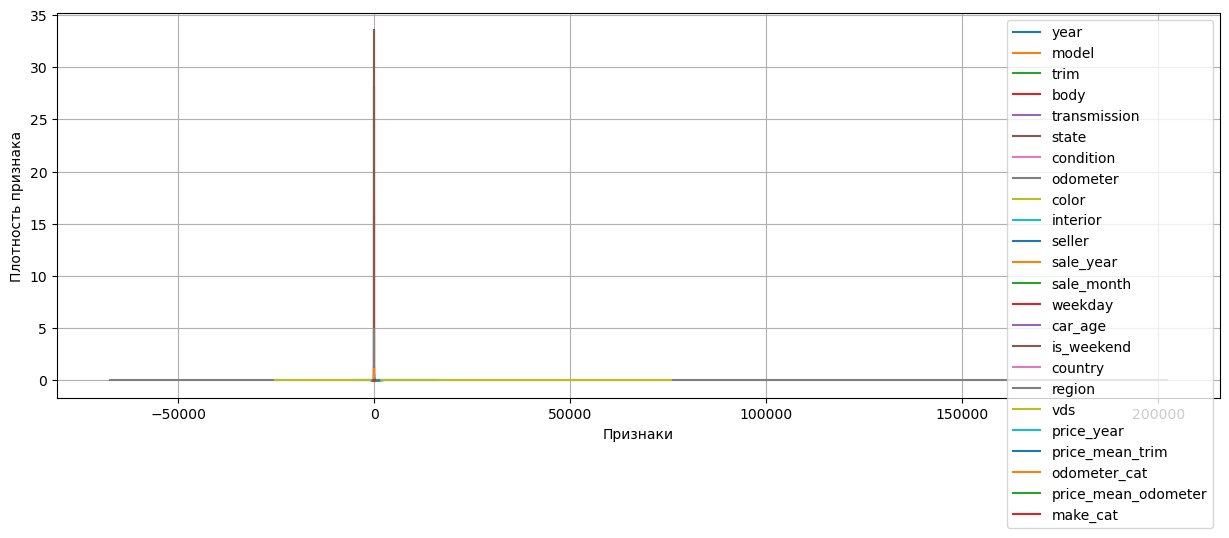

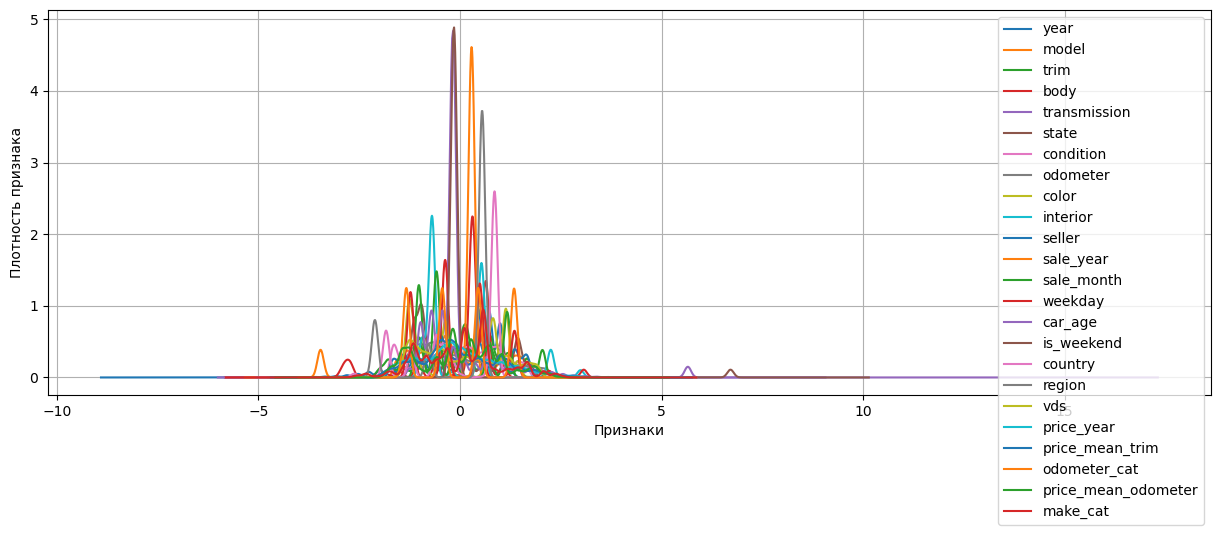

In [131]:
%%timeit -n 1 -r 1
features_train_encoded[numeric] = scaler_func(features_train_encoded, numeric)

1min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


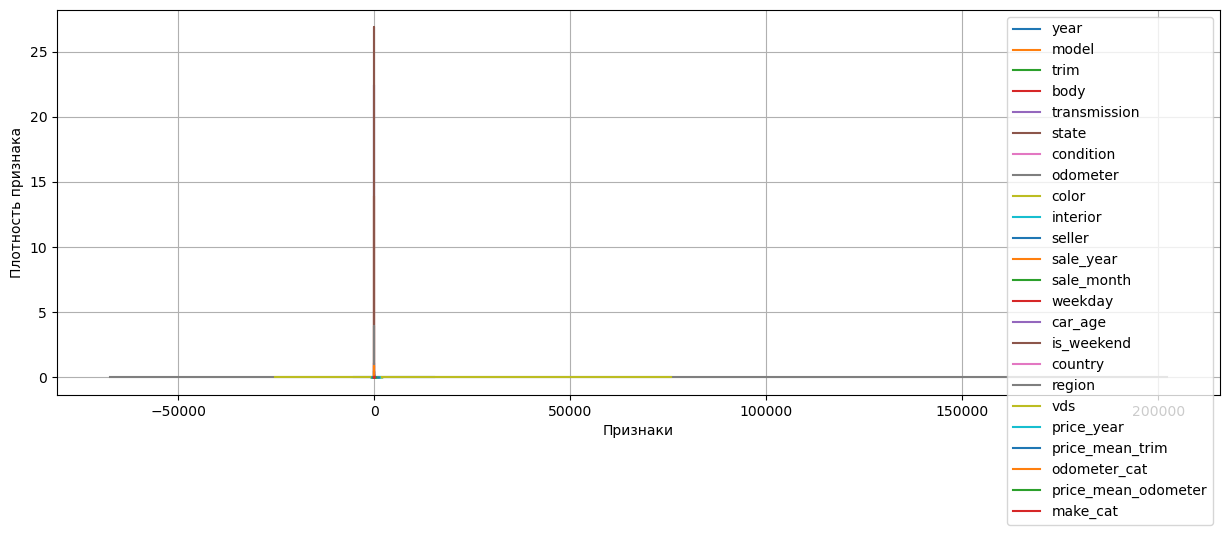

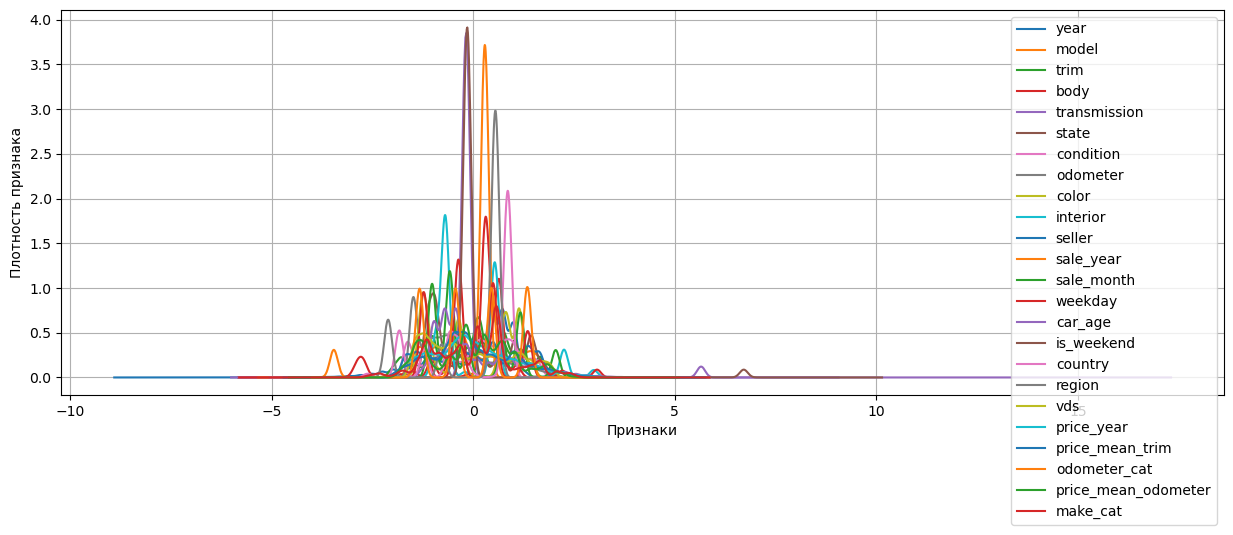

In [132]:
%%timeit -n 1 -r 1
features_valid_encoded[numeric] = scaler_func(features_valid_encoded, numeric)

**Вывод**

Для корректной работы линейной регрессии мы промасштабировали признаки.

## Линейная регрессия

Обучим модель линейной регрессии и получим предсказания на валидационной выборке. В качестве метрики используем MAPE.

In [133]:
model = LinearRegression()

In [134]:
model.fit(features_train_encoded, target_train)

LinearRegression()

In [135]:
predictions = model.predict(features_valid_encoded)

In [136]:
mape(target_valid, predictions)

0.4230130182646498

## Дерево решений

Обучим модель дерева решений. Подберём параметры при помощи GridSearchCV. После получения предсказаний посмотрим на важность признаков.

In [137]:
reg = DecisionTreeRegressor()

parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2),
              'min_samples_leaf': range (1, 5)}

In [138]:
grid = GridSearchCV(reg, parametrs, cv=5)
grid.fit(features_train_encoded, target_train)


KeyboardInterrupt



In [ ]:
grid.best_params_

In [139]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=12345, max_depth = 11, min_samples_split=8, min_samples_leaf=3)

model.fit(features_train_encoded, target_train)
predictions = model.predict(features_valid_encoded)

mape(target_valid, predictions)

0.20232273872731962

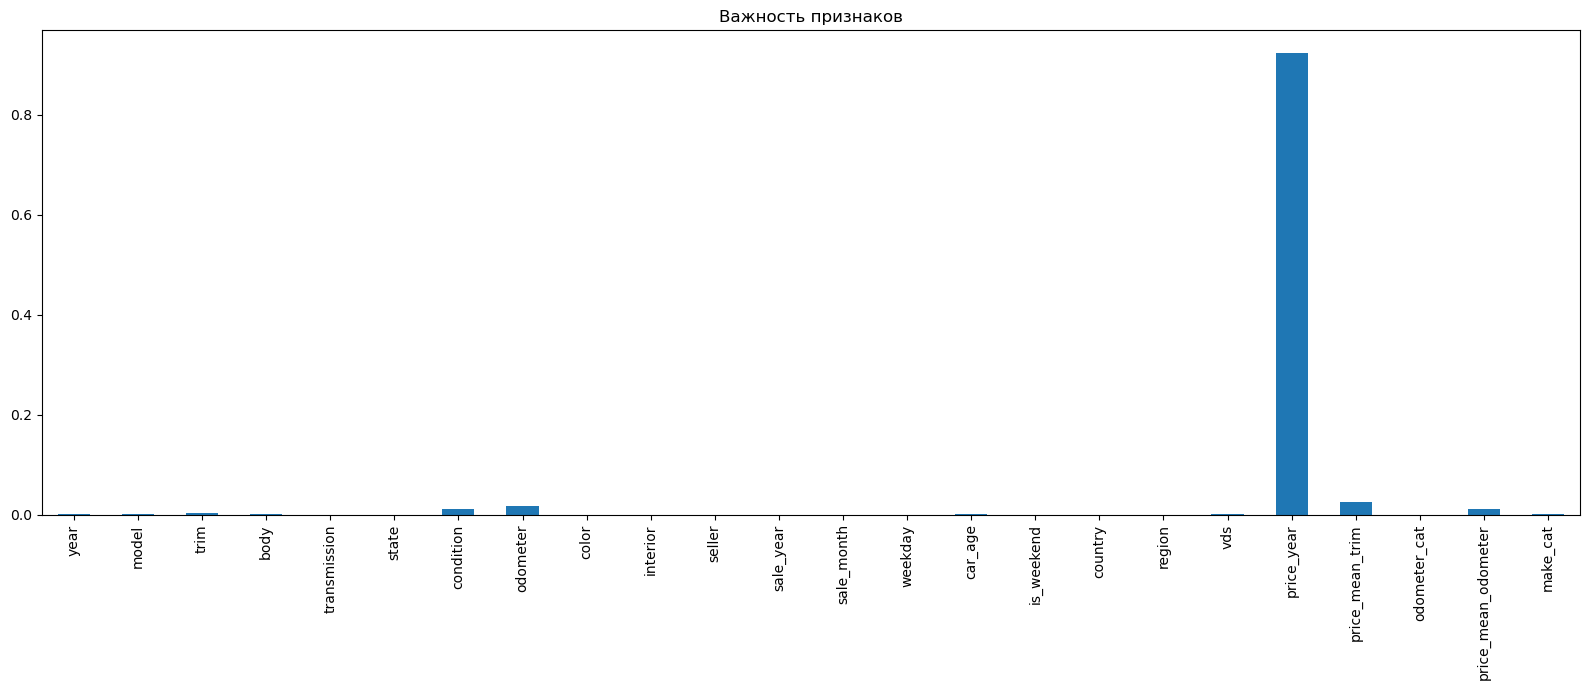

In [140]:
importances = pd.Series(model.feature_importances_,
                         features_train.columns)
fig, ax = plt.subplots(figsize=(16,7))
importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

## Случайный лес

In [ ]:
reg = RandomForestRegressor()

parametrs = { 'n_estimators': range (1, 6, 2),
              'max_depth': range (1, 13, 2)} #,
              #'min_samples_leaf': range (1,8) }


In [ ]:
%%timeit
grid = GridSearchCV(reg, parametrs, cv=5)
grid.fit(features_train_encoded, target_train)

In [ ]:
grid.best_params_

In [141]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=12345, n_estimators=5, max_depth = 11)

model.fit(features_train_encoded, target_train)
predictions = model.predict(features_valid_encoded)

mape(target_valid, predictions)

0.19592340097349376

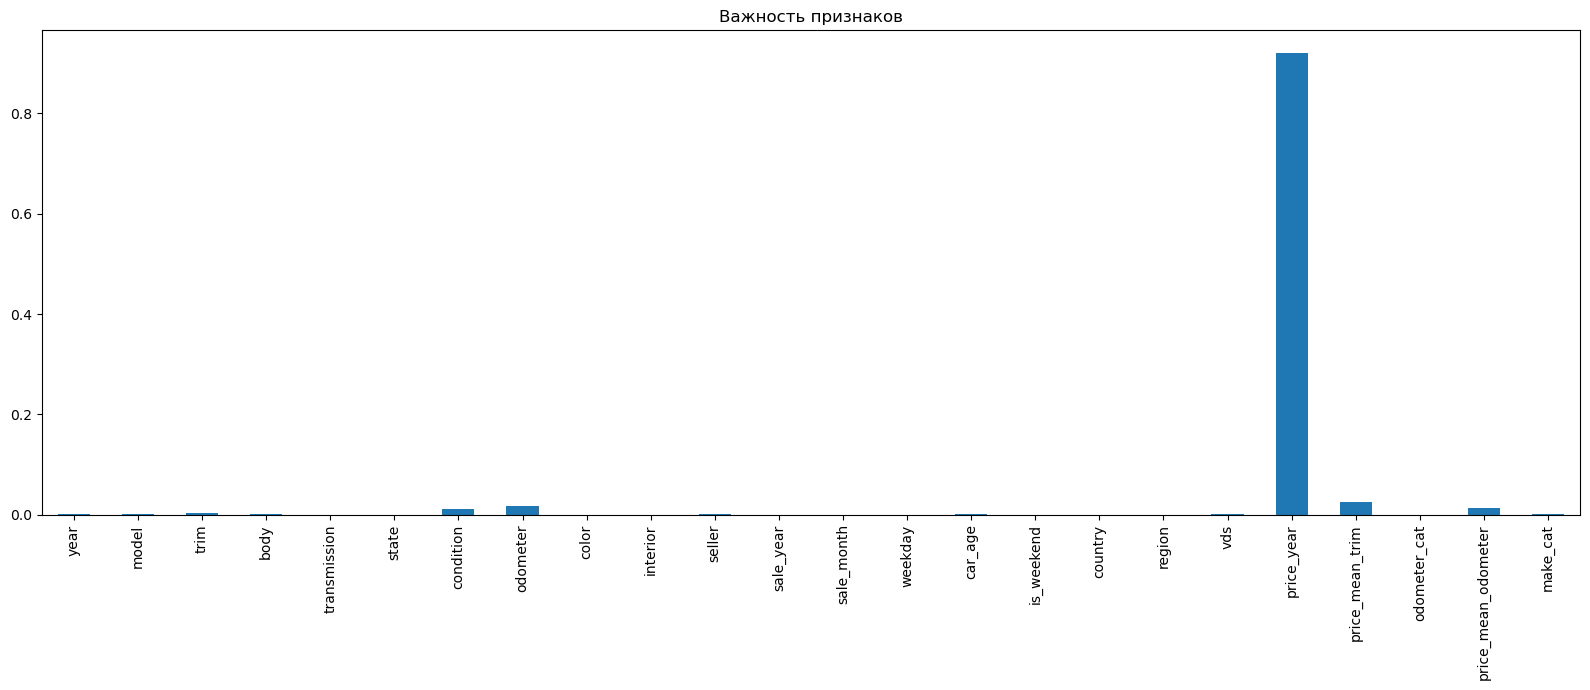

In [142]:
importances = pd.Series(model.feature_importances_,
                         features_train.columns)
fig, ax = plt.subplots(figsize=(16,7))
importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

## Catboost

In [143]:
train_data = features_train
train_label = target_train
test_data = features_valid

In [144]:
cat_features=['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 'country', 'region', 'vds']

In [145]:
train_pool = Pool(train_data, 
                  train_label, 
                  cat_features=cat_features)
test_pool = Pool(test_data, 
                 cat_features=cat_features) 

In [146]:
cat = CatBoostRegressor()

In [147]:
cat.fit(train_pool, verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [148]:
preds = cat.predict(test_pool)

In [149]:
mape(target_valid, preds)

0.12315858052818847

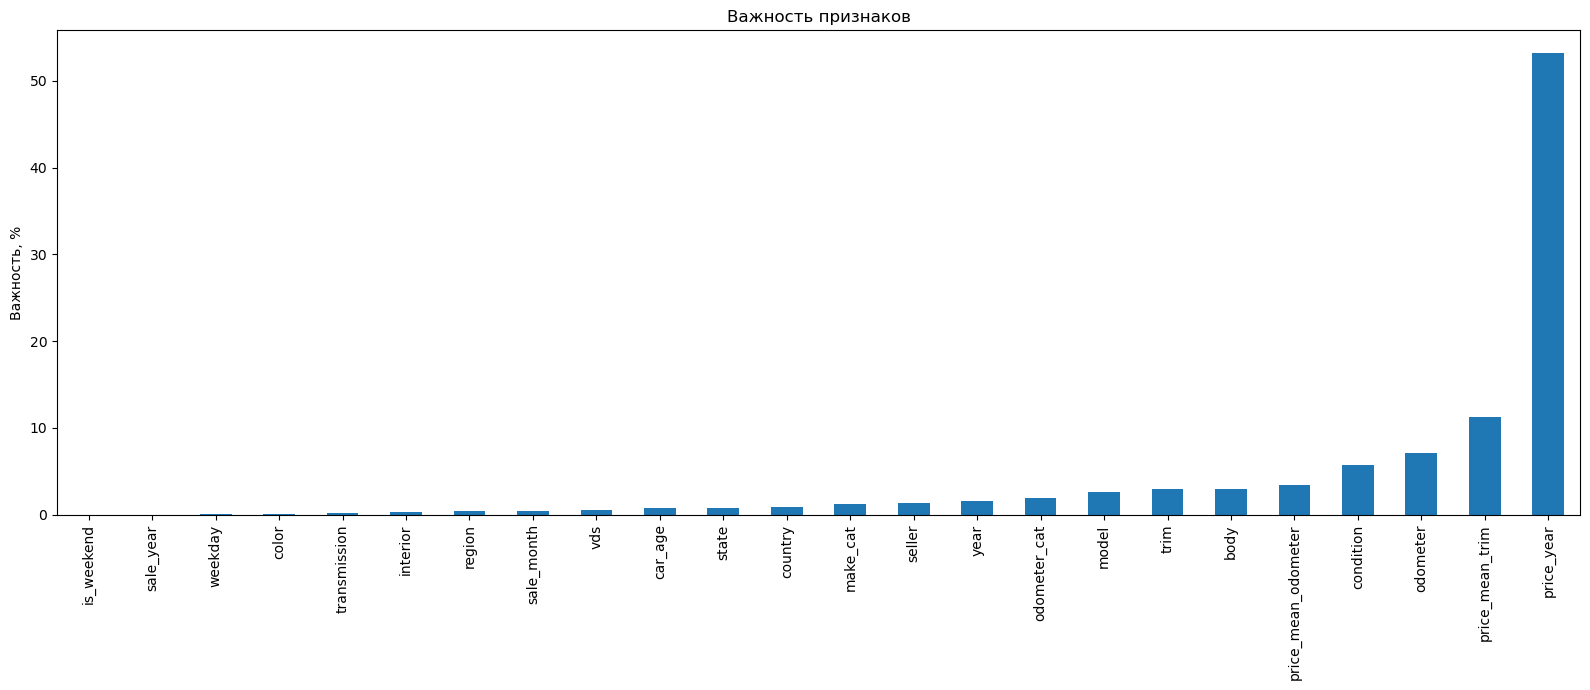

In [150]:
cat_imp = pd.Series(cat.get_feature_importance(),
                         features_train.columns).sort_values()
fig, ax = plt.subplots(figsize=(16,7))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

**Вывод**

Мы обучили 4 ML модели: линейную регрессию, дерево решений, лес решений, а также catboost (модель на основе градиентного бустинга). Лучшие результаты метрики показала модель catboost.

#### Получение прогноза на тестовой выборке

Для получения предсказаний на тестовой выборке, снова обучим модель, но на этот раз на всём тренировочном датасет. Так мы получим больше информации для обучения модели.

In [151]:
data_train_sellingprice = data_train_sellingprice.loc[data_train.index]
data_train_sellingprice = data_train_sellingprice.drop(['vin'], axis=1)
data_train_sellingprice

,sellingprice
0,12500
1,14500
2,9100
3,13300
4,1300
...,...
440231,16000
440232,24250
440233,16750
440234,33000


In [152]:
data_train.head()

,year,model,trim,body,transmission,vin,state,condition,odometer,color,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,2011,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,...,4,0,Canada,North America,DK3JC4,17000.0,20500.0,5,5000.0,44
1,2014,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,...,1,0,Mexico,North America,6P0H75,15200.0,12900.0,3,16700.0,44
2,2012,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,...,3,0,Mexico,North America,AB6AP4,9900.0,8450.0,3,14250.0,38
3,2003,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,...,12,0,United States,North America,GN23U9,13600.0,17225.0,5,11500.0,49
4,2007,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,...,8,0,Mexico,North America,HP08Z1,3800.0,11200.0,5,5000.0,44


In [153]:
data_test.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,...,car_age,is_weekend,country,region,vds,price_year,price_mean_trim,odometer_cat,price_mean_odometer,make_cat
0,2005,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,...,10,0,United States,North America,DP5674,3800.0,6900.0,5,5300.0,47
1,2014,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,...,1,0,United States,North America,W7FCA7,20400.0,20300.0,2,21150.0,56
2,2013,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,...,2,0,Japan,Asia,AZ1MW6,18000.0,11000.0,2,16000.0,38
3,2013,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,...,2,0,Canada,North America,WF5E34,9800.0,8900.0,4,9000.0,22
4,2013,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,...,2,0,United States,North America,AA0EC3,22200.0,21000.0,3,14250.0,38


In [154]:

data_test.isna().sum()
data_train.columns


Index(['year', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'sale_year', 'sale_month', 'weekday', 'car_age', 'is_weekend',
       'country', 'region', 'vds', 'price_year', 'price_mean_trim',
       'odometer_cat', 'price_mean_odometer', 'make_cat'],
      dtype='object')

In [155]:
data_train_vin = data_train['vin']
data_train = data_train.drop('vin', axis=1)

In [156]:
data_train_sellingprice = data_train['sellingprice']
data_train = data_train.drop('sellingprice', axis=1)

In [157]:
train_pool = Pool(data_train,
                  data_train_sellingprice,
                 cat_features=cat_features)

In [158]:
test_pool = Pool(data_test, 
                 cat_features=cat_features) 

In [159]:
cat.fit(train_pool, verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [160]:
test_preds = cat.predict(test_pool)
preds

array([ 3106.52365877, 17523.9367228 , 18209.87178687, ...,
       42011.67221755, 10998.49910802,  2898.2146721 ])

In [161]:
data_test_predictions = data_test_vin.to_frame()

In [162]:
data_test_predictions['sellingprice'] = test_preds

In [163]:
data_test_predictions

,vin,sellingprice
0,1g6dp567450124779,4145.358378
1,1gtw7fca7e1902207,21889.877589
2,jn8az1mw6dw303497,19211.833744
3,2g1wf5e34d1160703,8961.154209
4,1n6aa0ec3dn301209,22542.880310
...,...,...
110053,1j4aa2d17bl584330,17119.648254
110054,jthbf1d23e5007526,28784.431646
110055,1n4ba41e54c831950,4373.248699
110056,jn1az4eh3dm382431,20831.496296


In [164]:
data_test_predictions.to_csv(r'C:\Users\Katya\Desktop\ds_learning\14sprint_masterskaya\test_predictions.csv', index= False )

## Общий вывод

**1. Загрузка данных**


**2. Предобработка данных**

На этапе предобработки данных мы заполнили пропуски в данных `transmission`  - характеристика коробки передач (механика или автомат).Для этого выснили какой тип коробки передач наиболее часто встречается среди данного типа модели, производителя, года выпуска. Также мы заполнили модой данные о цвете кузова и салона. При помощи библиотеки vininfo заполнили пропуски в признаке `make` - производитель.

Также мы удалили неявные дубликаты в категориальных признаках приведя всё к нижнему регистру.

После удаления строк с пропуками из обучающей выборки мы потерыли около 4% данных, что допустимо. Для тестовой выборки мы заполнили все пропуски, чтобы получить предсказания по всем объектам.

**3. Создание дополнительных признаков**

Мы создали дополнительные признаки: год, месяц, день недели продажи, возраст машины, а также выходной или будний день был день продажи.


Для каждого объекта мы добавили данные о стране и регионе производства машины, а также vds (Vehicle Description Section) номер, в который состоит из шести знаков, обозначающих транспортное средство согласно конструкторской документации. Расшифровка второй части вин кода автомобиля может рассказать о типе кузова, двигателя, коробки передач, классе безопасности, оснащении.

**4. Исследовательский анализ данных**

На этапе исследовательского анализа мы удалили выбросы в признаках `sellingprice`(цена продажи) и `odometer` (пробег). Выяснили, что есть прямая связь между маркойи моделью машины и ценой продажи.


**5. Кодирование данных**

Мы закодироали производителей авто вручную. Для этого составили список, в котором марки распределены по возрастанию стоимости. Более недорогим маркам соответсвуют меньшие индексы. Используем список для ручного кодирования признака 'make'.
Остальные категориальные признаки закодировали при помощи OrdinalEncoder.

Также для корректной работы линейной регрессии мы промасштабировали признаки.

**6. Обучение моделей**

Мы обучили 4 ML модели: линейную регрессию, дерево решений, лес решений, а также catboost (модель на основе градиентного бустинга). Лучшие результаты метрики показала модель catboost.
Для получения предсказаний на тестовой выборке, снова обучим модель, но на этот раз на всём тренировочном датасет. Так мы получим больше информации для обучения модели.
